### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**
- There are missing values in the dataset, we can see NaN values from looking at first 5 observations
- There are 5960 observations and 13 columns in the dataset. Reason and Job are categorical variables. DEROG, DELINQ, CLAGE, NINQ, CLNO are frequency related variables

### **Check the data types of the columns**

In [5]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights** 
 - There are missing values in all variables except LOAN and BAD- the target variable.

### **Check for missing values**

In [8]:
# Analyse missing values
data.isnull()

BAD   LOAN  MORTDUE  VALUE  REASON    JOB    YOJ  DEROG  DELINQ  \
0     False  False    False  False   False  False  False  False   False   
1     False  False    False  False   False  False  False  False   False   
2     False  False    False  False   False  False  False  False   False   
3     False  False     True   True    True   True   True   True    True   
4     False  False    False  False   False  False  False  False   False   
...     ...    ...      ...    ...     ...    ...    ...    ...     ...   
5955  False  False    False  False   False  False  False  False   False   
5956  False  False    False  False   False  False  False  False   False   
5957  False  False    False  False   False  False  False  False   False   
5958  False  False    False  False   False  False  False  False   False   
5959  False  False    False  False   False  False  False  False   False   

      CLAGE   NINQ   CLNO  DEBTINC  
0     False  False  False     True  
1     False  False  False     True  
2     False  False  False     True  
3      True   True   True     True  
4     False  False  False     True  
...     ...    ...    ...      ...  
5955  False  False  False    False  
5956  False  False  False    False  
5957  False  False  False    False  
5958  False  False  False    False  
5959  False  False  False    False  

[5960 rows x 13 columns]

In [6]:
# Check the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights**
- DEBTINC has 21% missing values and DEROG has 12% missing values. Percenatge of missing values is better to consider than total count. The %of missing values is less than 25% for all the variables hence all of them can be considered for data modelling.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [7]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [8]:
cols

['REASON', 'JOB', 'BAD']

In [9]:
# Changing the data type of object type column to category. for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [10]:
# Analyze the summary statistics for numerical variables

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights** 
- Average loan amount is 18,608. Median is 16,300 implying right skewed distribution.
- Average Amount due on existing Mortgage is 73,760 which is greater than the median of 65,000 indicating a right skewed distribution.
- VALUE,Current value of the property, is at the average of 101,776 with a median of 89,235 indicating a right skewed distribution.
- YOJ, Years at the present job 9 years; Maximum being 41 years. 
- More than 75% of the observations have values 0 in DEROG and DELINQ variables.
- CLAGE, Age of the oldest credit line in months has a mean of 179 months (15 years) close to the median of 173 months.
- NINQ, no of recent credit inquiries and CLNO, no of existing credit lines are normally distributed; mean is approximately equal to median.
- DEBTINC, Debt to Income ratio have a normal distribution, Mean is closer to median. There is large difference from 75th percentile to the maximum value of 203 indicating presence of outliers.

In [11]:
# Check summary for categorical data 
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights** 
- Target variable, BAD has 2 categories with O (Good accounts) most frequent category with 4771 observations
- Reason has 2 categories, shows missing values and DebtCon being the most frequent category
- Job has 6 categories with Other being the most frequent category

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights _____________**

In [12]:
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Percent Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Percent Unique values in BAD are :
0    80.1%
1    19.9%
Name: BAD, dtype: object
Percent Unique values in REASON are :
DebtCon    68.8%
HomeImp    31.2%
Name: REASON, dtype: object
Percent Unique values in JOB are :
Other      42.0%
ProfExe    22.5%
Office     16.7%
Mgr        13.5%
Self        3.4%
Sales       1.9%
Name: JOB, dtype: object


##Insights:
- 70% of the Loan accounts took HELOC for the purpose of Debt Consolidation
- Job category 'OTHER' comprises of 44.7% of the loan accounts

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [15]:
def histogram_boxplot(feature, figsize=(4,4), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (4,4))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Histogram and Boxplot

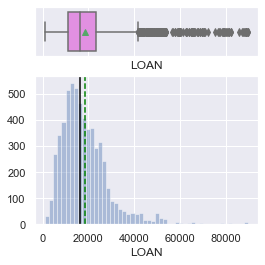

In [16]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights** 
- The box plot shows presnce of outliers. We can see from histogram there are few high value loans above 60,000 
- Histogram shows the distribution is skewed to the right.

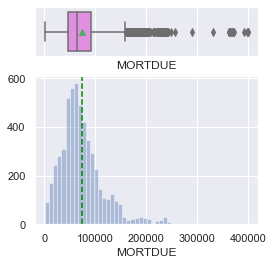

In [17]:
histogram_boxplot(data['MORTDUE'])

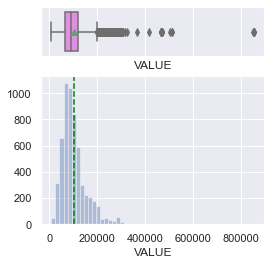

In [18]:
histogram_boxplot(data['VALUE'])

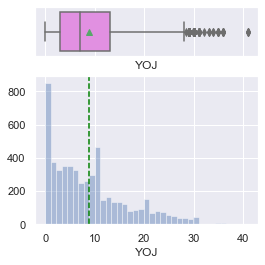

In [19]:
histogram_boxplot(data['YOJ'])

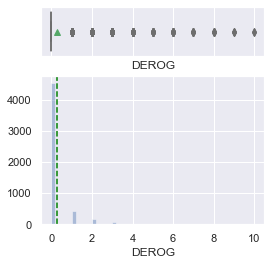

In [20]:
histogram_boxplot(data['DEROG'])

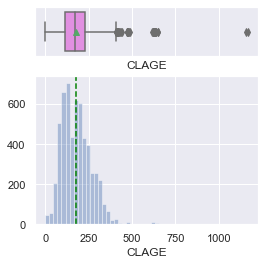

In [21]:
histogram_boxplot(data['CLAGE'])

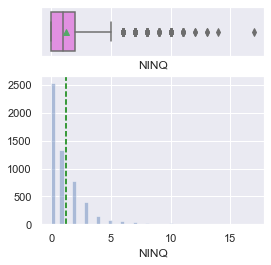

In [22]:
histogram_boxplot(data['NINQ'])

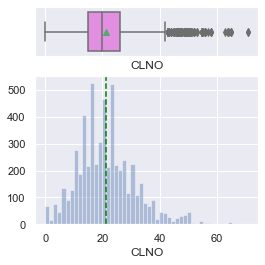

In [23]:
histogram_boxplot(data['CLNO'])

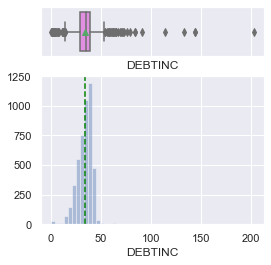

In [24]:
histogram_boxplot(data['DEBTINC'])

### **2. Univariate Analysis - Categorical Data**

In [37]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 8) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

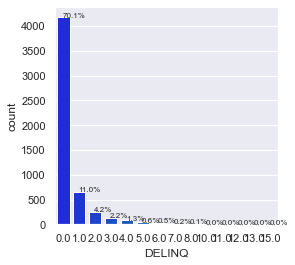

In [38]:
#Build barplot for DELINQ

plt.figure(figsize=(4,4))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

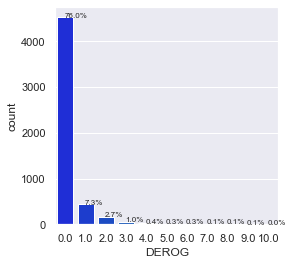

In [39]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

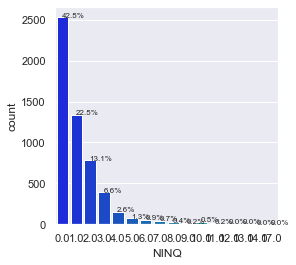

In [40]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

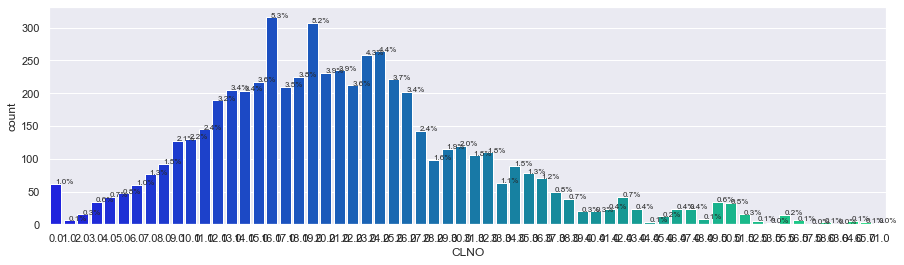

In [45]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data["CLNO"],palette='winter')
perc_on_bar(ax,data["CLNO"])

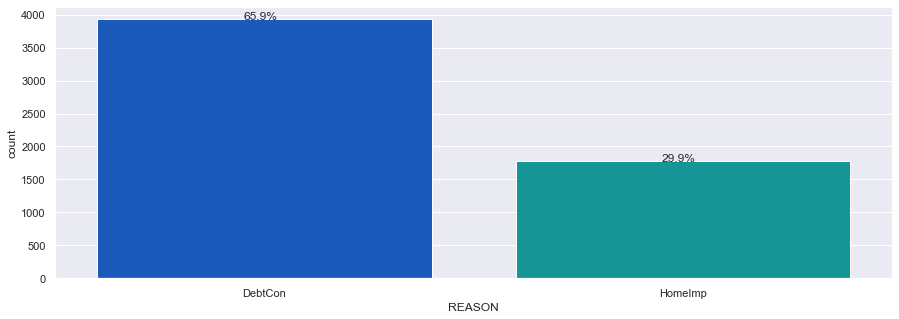

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

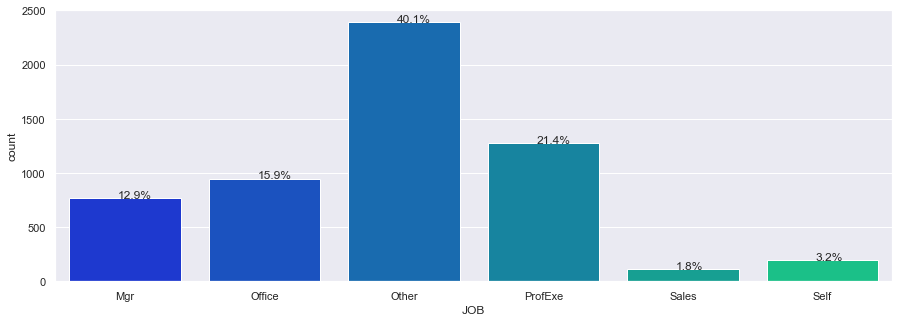

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

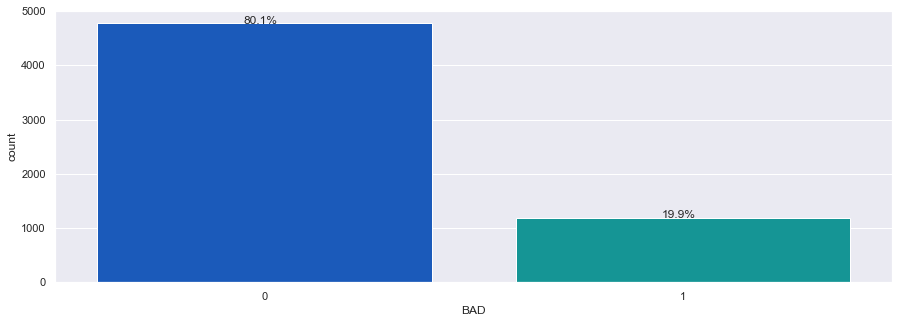

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

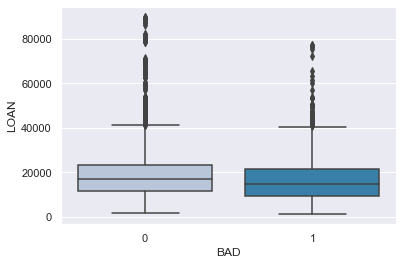

In [36]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

REASON vs LOAN


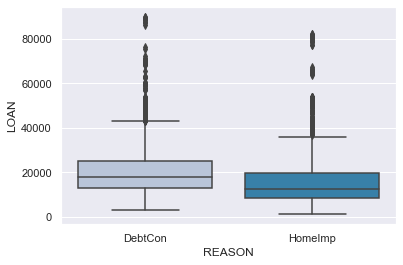

JOB vs LOAN


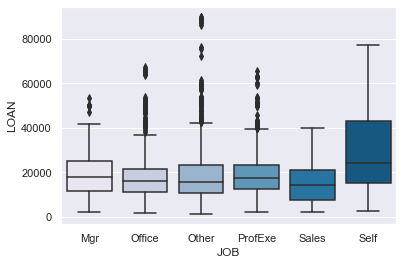

DEROG vs LOAN


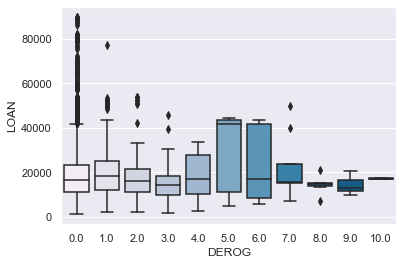

DELINQ vs LOAN


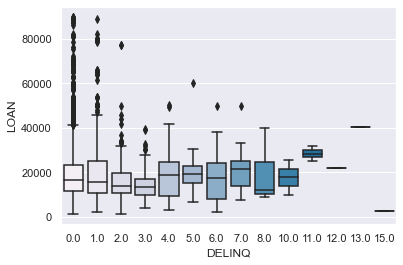

NINQ vs LOAN


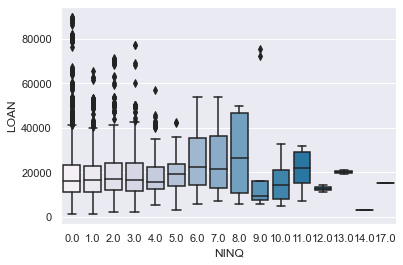

CLNO vs LOAN


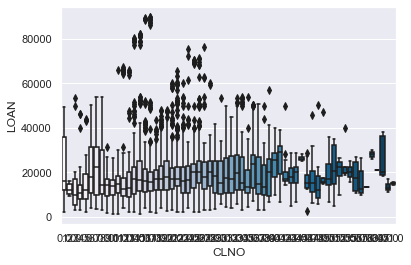

REASON vs MORTDUE


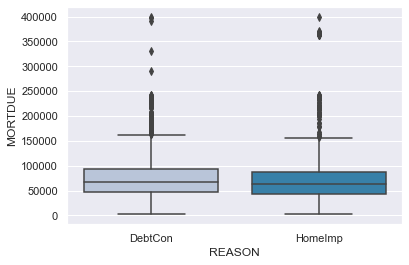

JOB vs MORTDUE


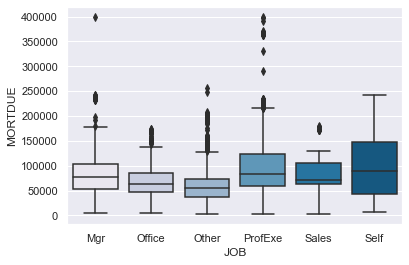

DEROG vs MORTDUE


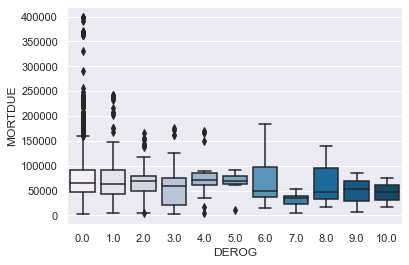

DELINQ vs MORTDUE


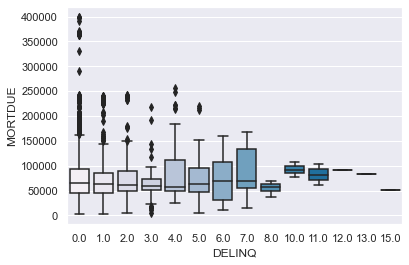

NINQ vs MORTDUE


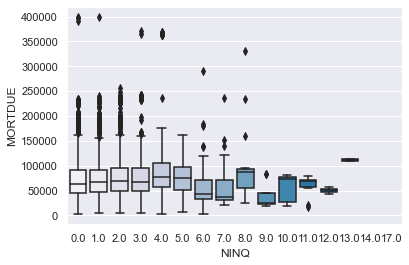

CLNO vs MORTDUE


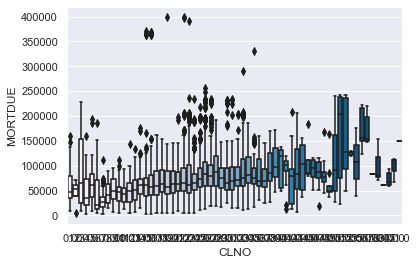

REASON vs VALUE


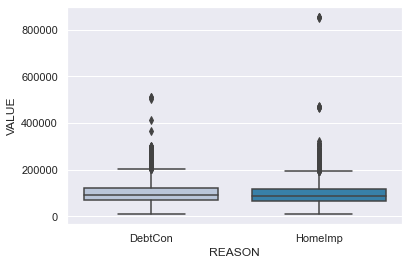

JOB vs VALUE


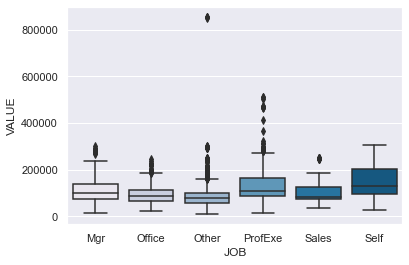

DEROG vs VALUE


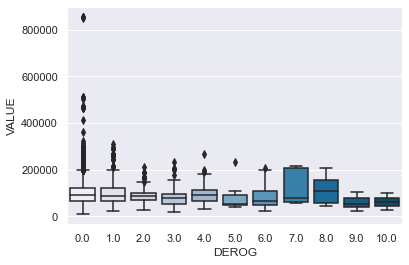

DELINQ vs VALUE


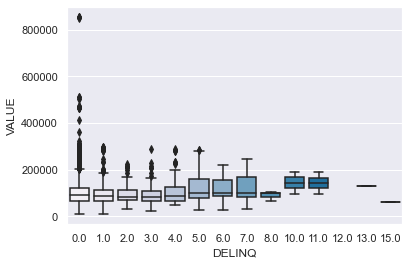

NINQ vs VALUE


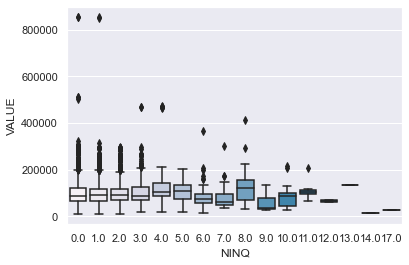

CLNO vs VALUE


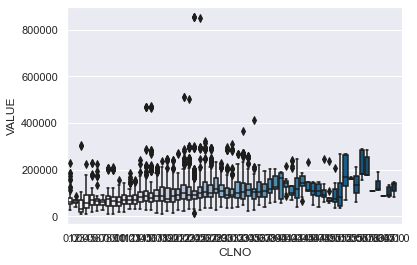

REASON vs YOJ


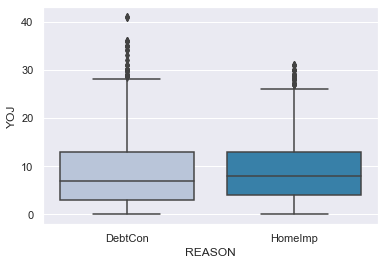

JOB vs YOJ


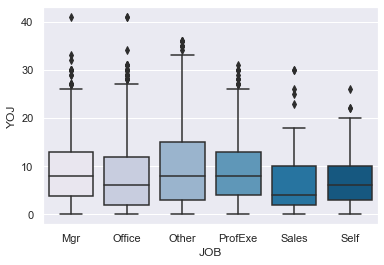

DEROG vs YOJ


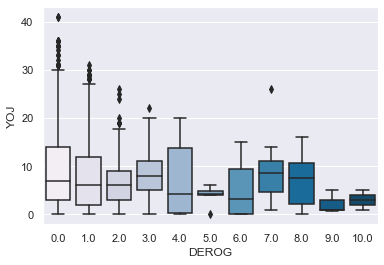

DELINQ vs YOJ


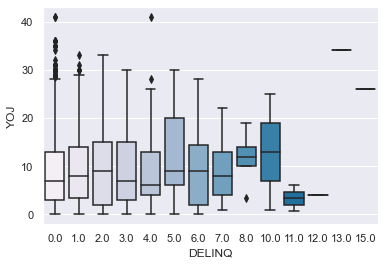

NINQ vs YOJ


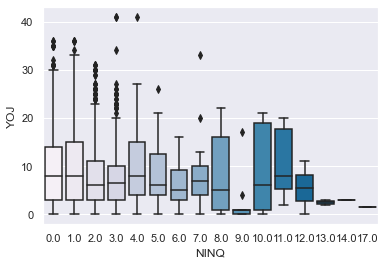

CLNO vs YOJ


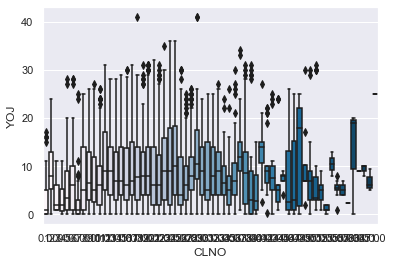

REASON vs CLAGE


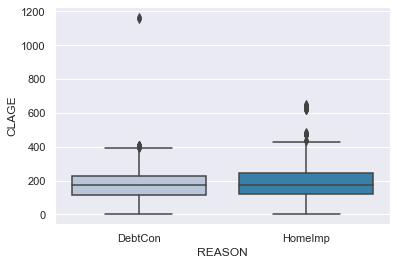

JOB vs CLAGE


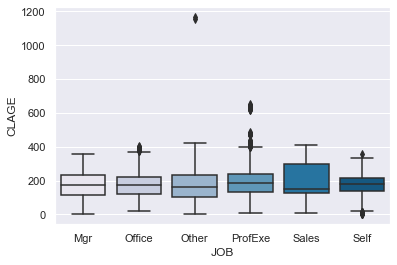

DEROG vs CLAGE


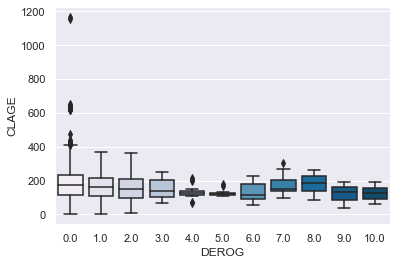

DELINQ vs CLAGE


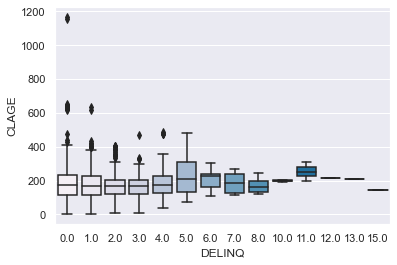

NINQ vs CLAGE


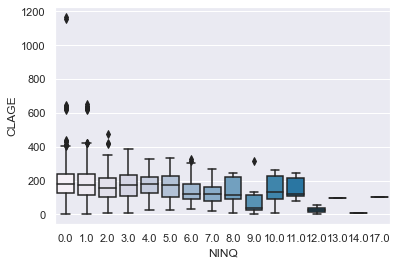

CLNO vs CLAGE


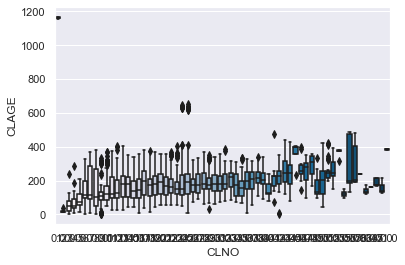

REASON vs DEBTINC


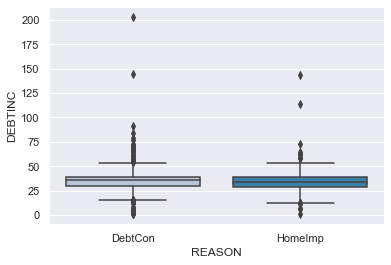

JOB vs DEBTINC


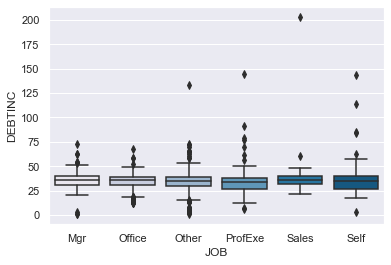

DEROG vs DEBTINC


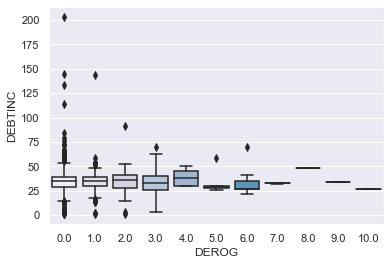

DELINQ vs DEBTINC


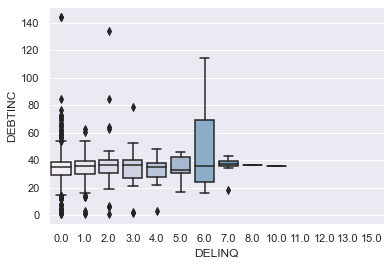

NINQ vs DEBTINC


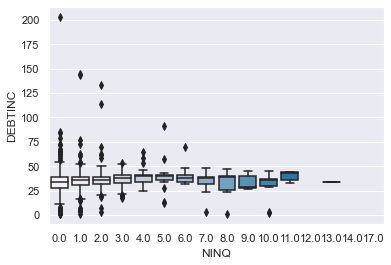

CLNO vs DEBTINC


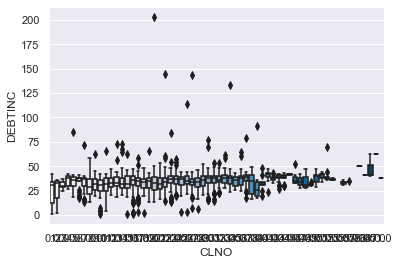

In [37]:
for cont_col in ['LOAN', 'MORTDUE','VALUE','YOJ','CLAGE','DEBTINC']:
    for cat_col in ['REASON','JOB','DEROG','DELINQ','NINQ','CLNO']:
        print(cat_col,'vs',cont_col)
        sns.boxplot(data[cat_col],data[cont_col],palette="PuBu")
        plt.show()

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

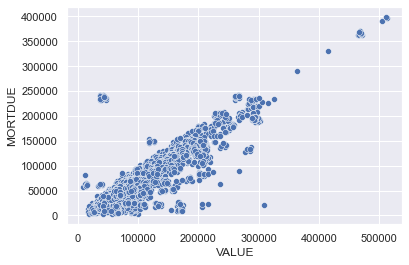

In [38]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

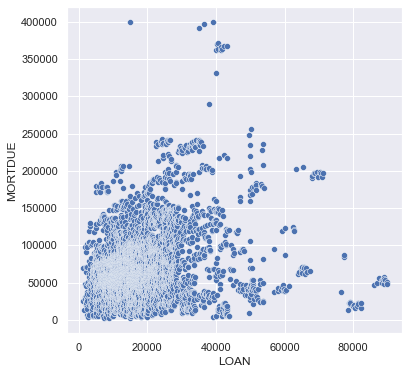

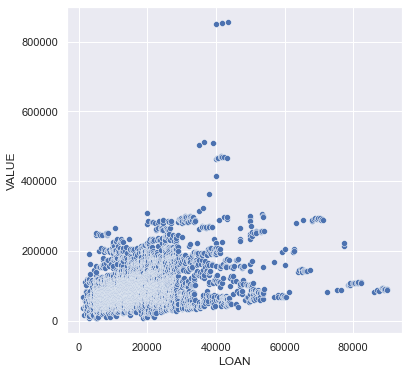

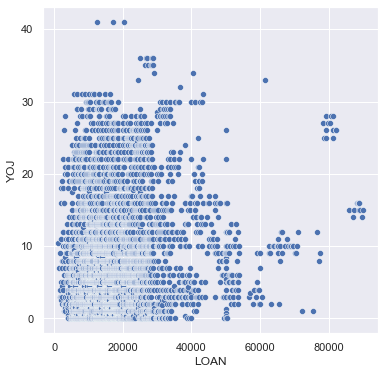

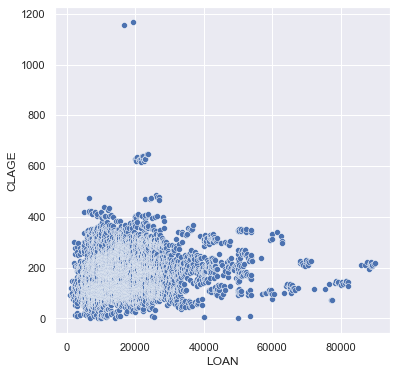

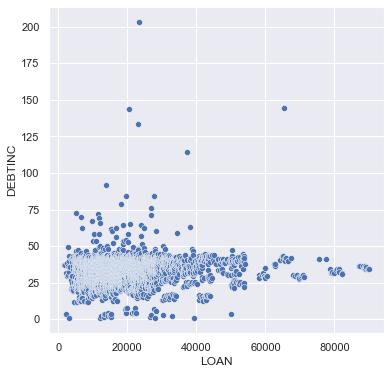

In [39]:
cont_col = ['MORTDUE','VALUE','YOJ','CLAGE','DEBTINC']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['LOAN'],data[y])
count +=1
plt.show()

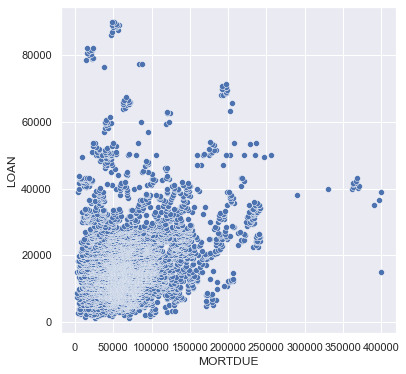

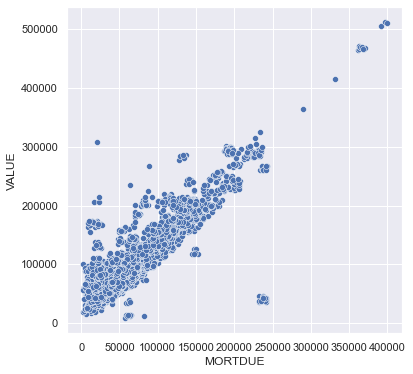

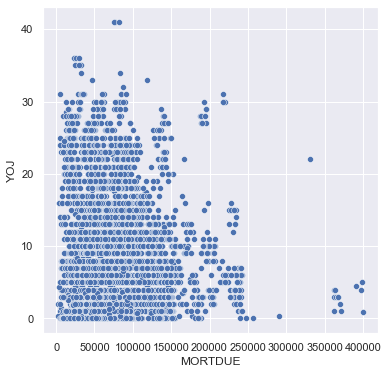

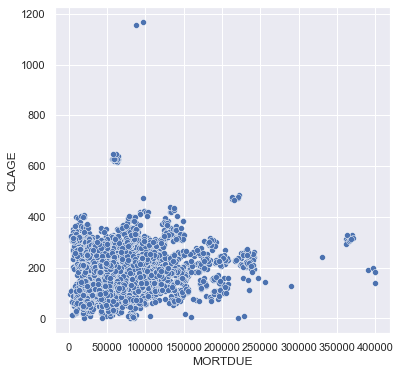

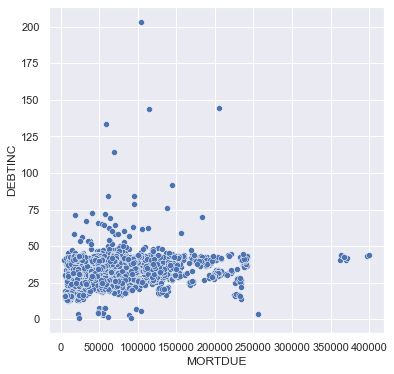

In [40]:
cont_col = ['LOAN','VALUE','YOJ','CLAGE','DEBTINC']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['MORTDUE'],data[y])
count +=1
plt.show()

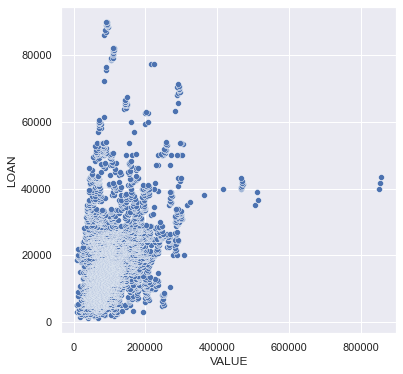

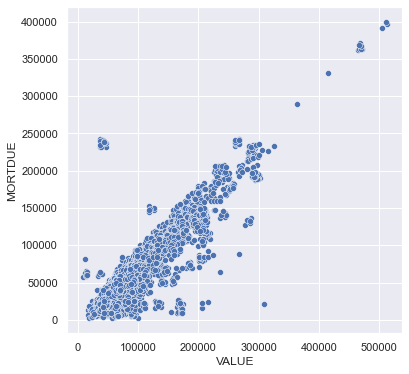

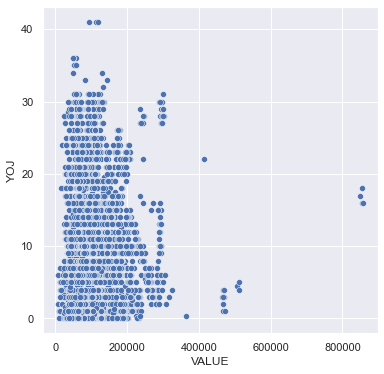

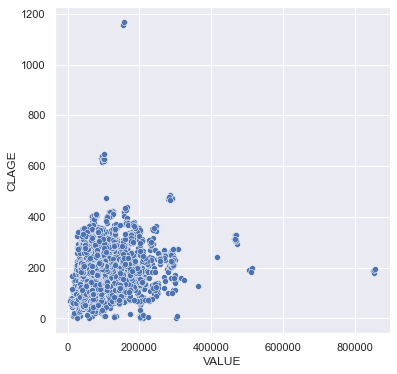

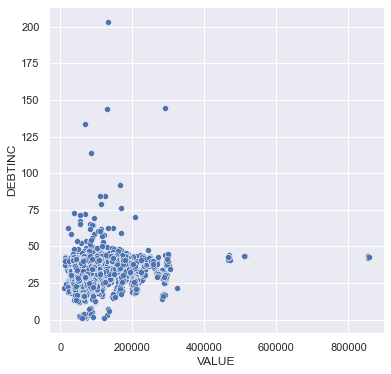

In [41]:
cont_col = ['LOAN','MORTDUE','YOJ','CLAGE','DEBTINC']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['VALUE'],data[y])
count +=1
plt.show()

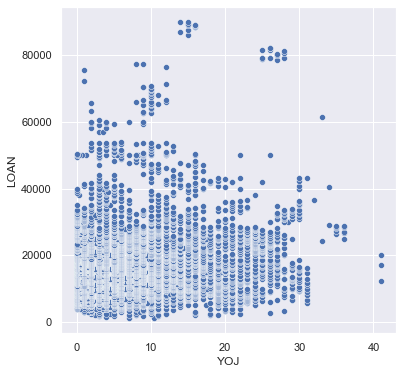

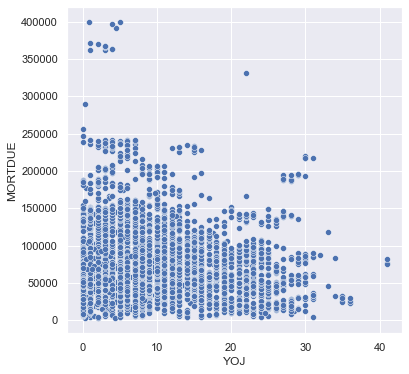

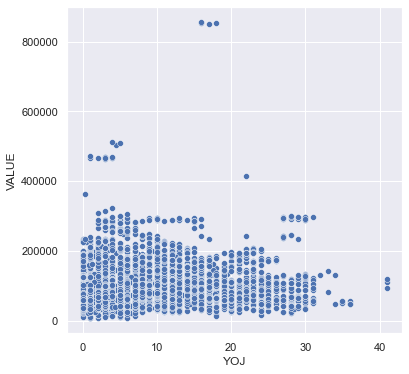

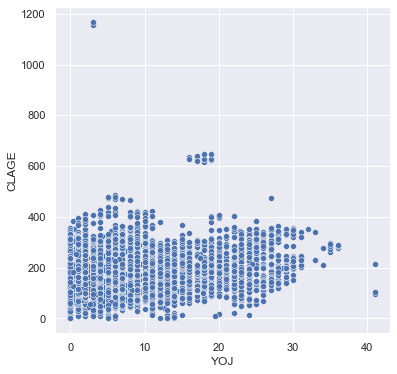

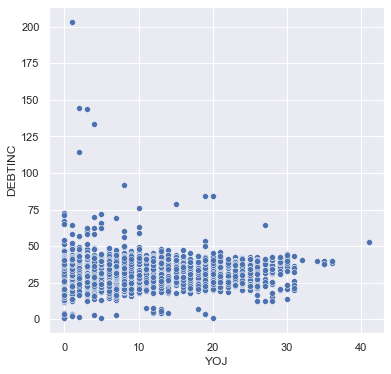

In [42]:
cont_col = ['LOAN','MORTDUE','VALUE','CLAGE','DEBTINC']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['YOJ'],data[y])
count +=1
plt.show()

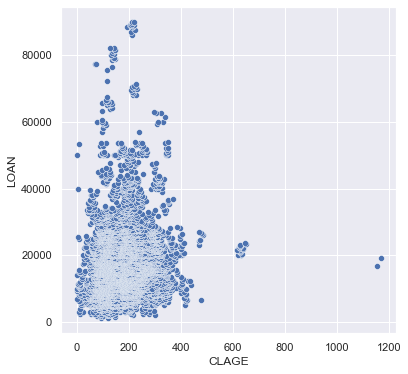

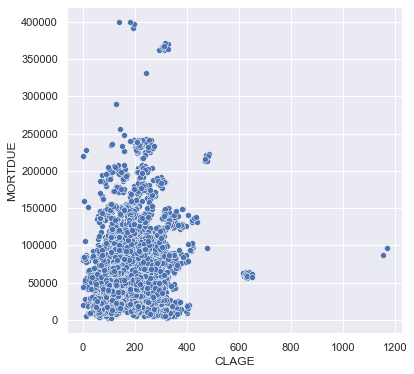

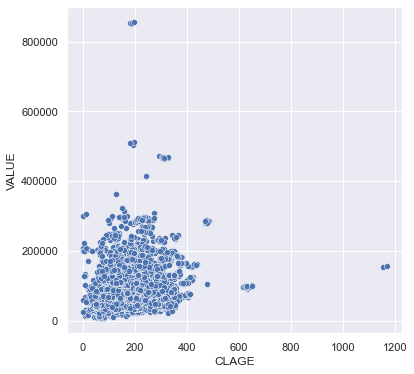

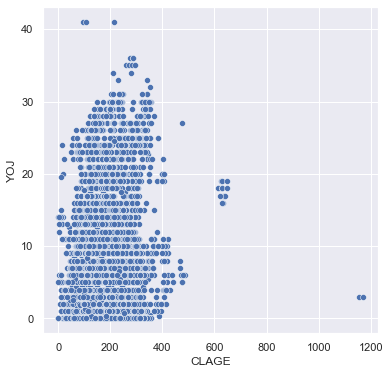

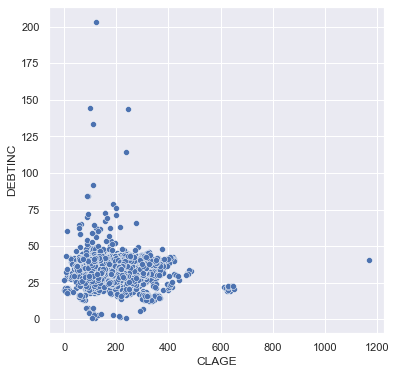

In [43]:
cont_col = ['LOAN','MORTDUE','VALUE','YOJ','DEBTINC']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['CLAGE'],data[y])
count +=1
plt.show()

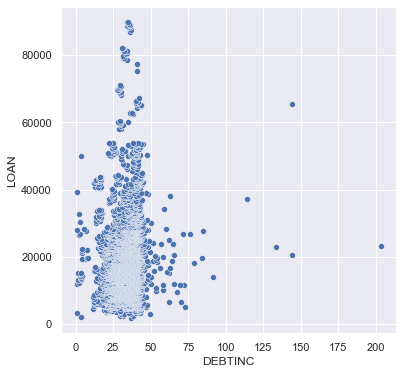

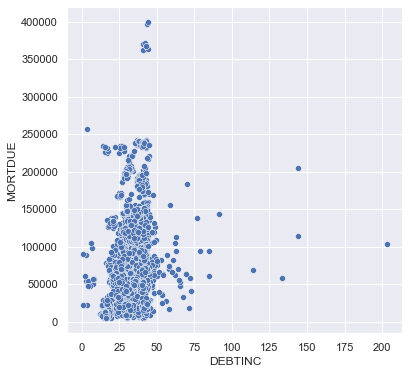

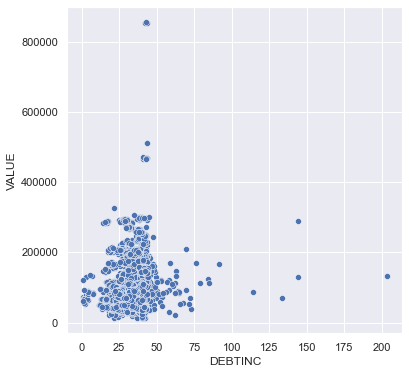

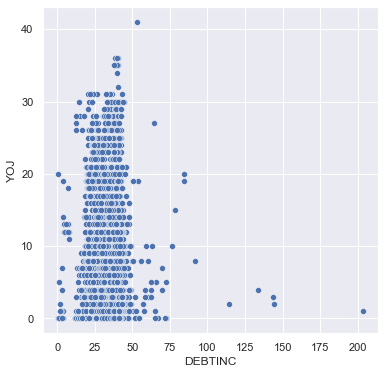

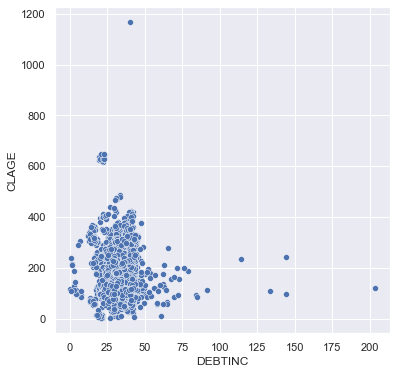

In [44]:
cont_col = ['LOAN','MORTDUE','VALUE','YOJ','CLAGE']
count = 1
for y in cont_col:
    plt.subplots(figsize=(6, 6))
    sns.scatterplot(data['DEBTINC'],data[y])
count +=1
plt.show()

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [67]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


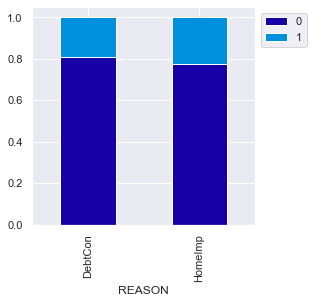

In [56]:
# Plot stacked bar plot for BAD and REASON

stacked_plot(data['REASON'])

**Insights ____________**

#### **Bivariate Analysis on different pairs of Categorical vs BAD**

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


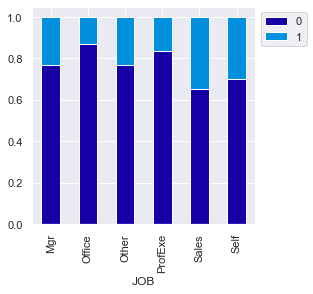

In [57]:
stacked_plot(data['JOB'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


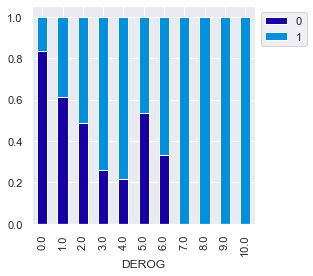

In [58]:
stacked_plot(data['DEROG'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


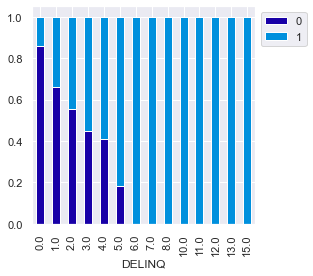

In [59]:
stacked_plot(data['DELINQ'])

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


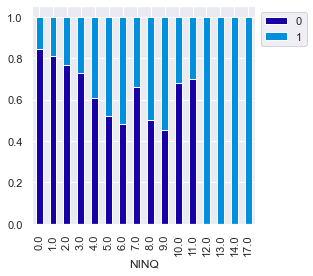

In [61]:
stacked_plot(data['NINQ'])

BAD      0     1   All
CLNO                  
0.0     37    25    62
1.0      1     5     6
2.0      0    15    15
3.0     21    13    34
4.0     31    11    42
...    ...   ...   ...
63.0     0     1     1
64.0     0     5     5
65.0     0     3     3
71.0     0     2     2
All   4602  1136  5738

[63 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


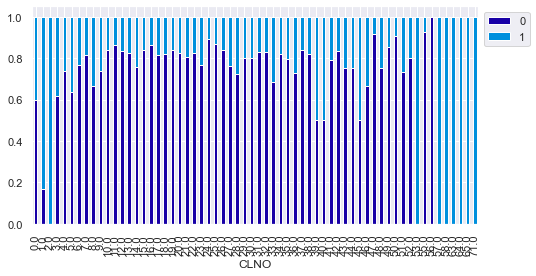

In [68]:
stacked_plot(data['CLNO'])

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

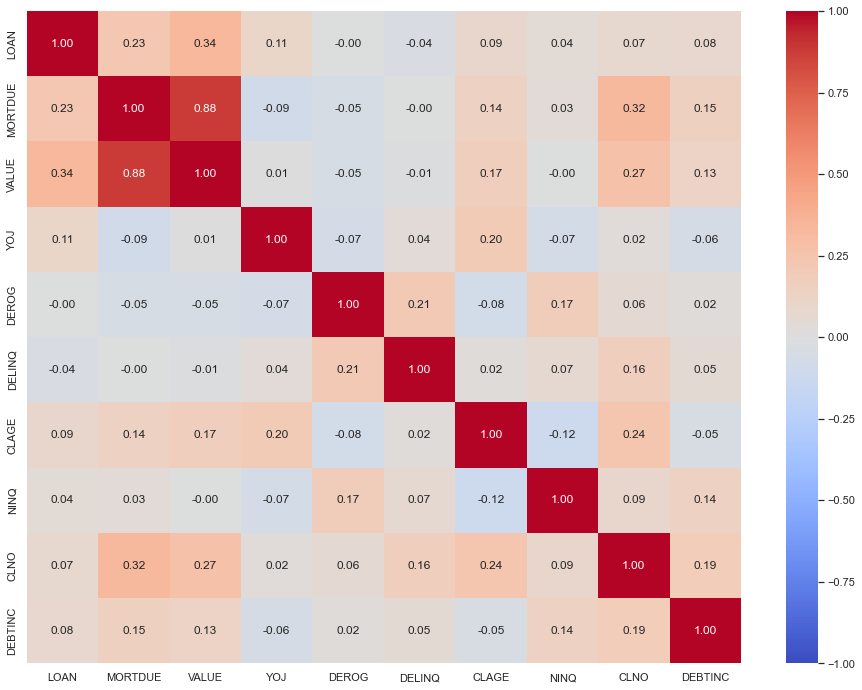

In [53]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',annot = True, vmax=1,vmin=-1, fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);



<Figure size 576x576 with 0 Axes>

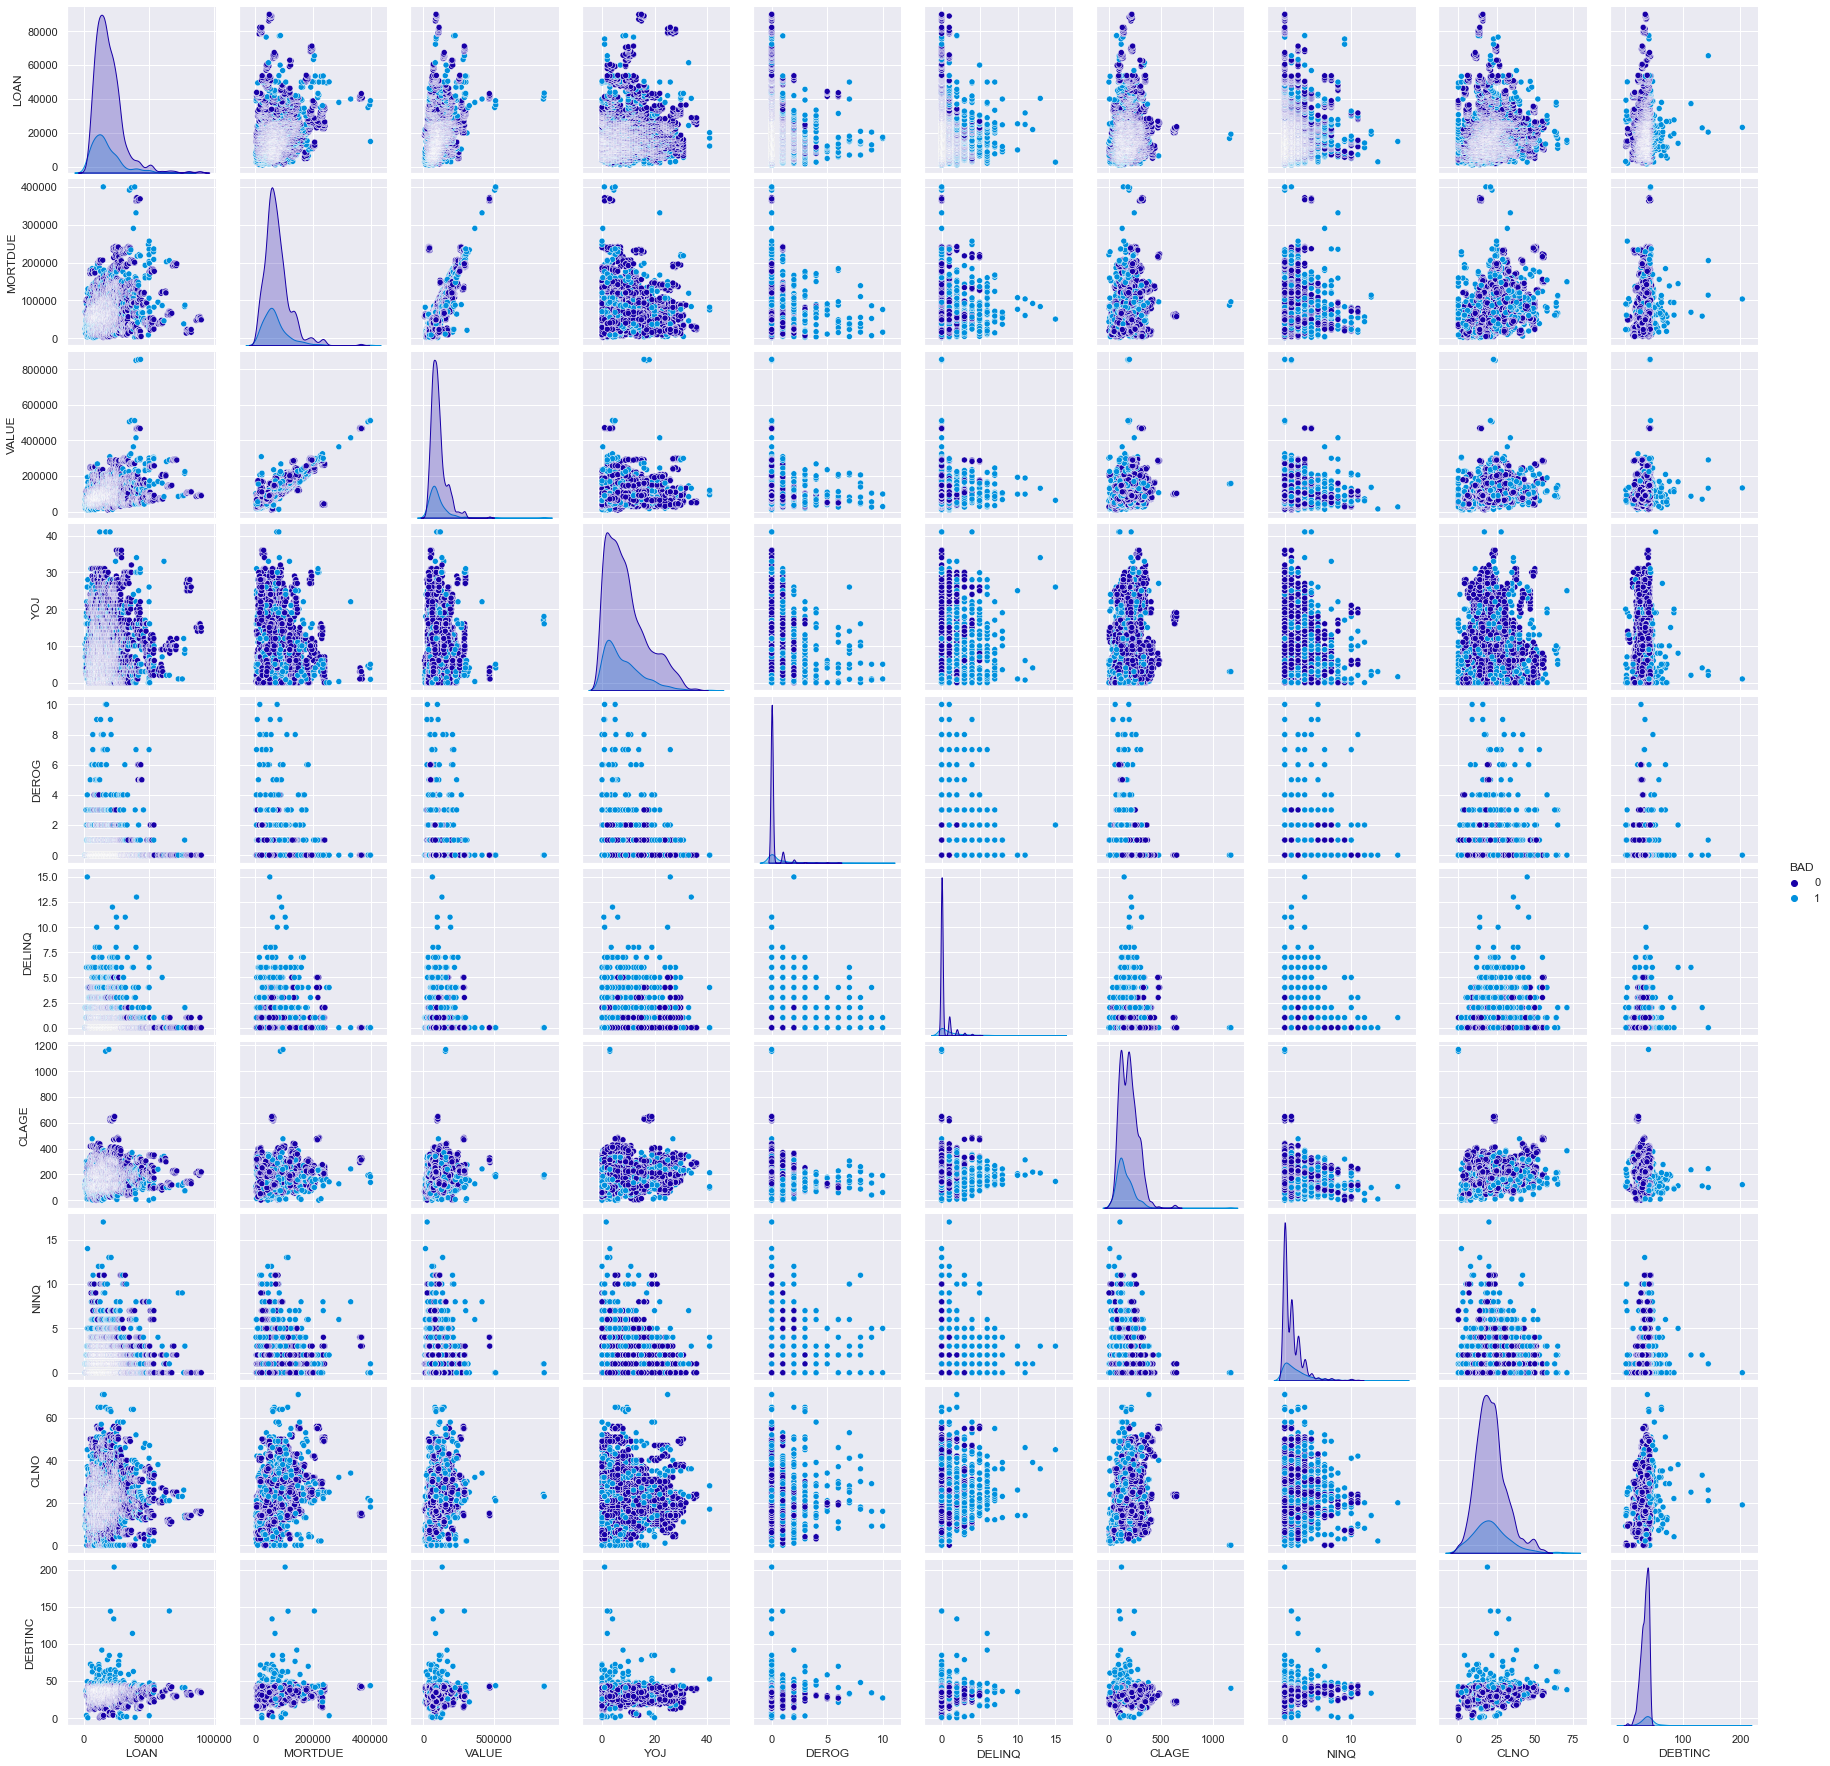

In [54]:
# Build pairplot for the data with hue = 'BAD'

plt.figure(figsize = (8,8))
sns.pairplot(data,hue='BAD')
plt.show()

#### Treating Outliers

In [55]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df.quantile(q = 0.25) # 25th quantile
    Q3 = df.quantile(q = 0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = (Q1 - 1.5 * IQR)[col]  #define lower whisker
    Upper_Whisker = (Q3 + 1.5 * IQR)[col] # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [56]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [57]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [58]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [59]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(data[column].mode()[0])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [61]:
(data.isnull().sum()/data.shape[0] * 100)

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
dtype: float64

**Data Preparation**

***Seperating the target from other variables***

In [62]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
df = pd.get_dummies(data = data, columns = to_get_dummies_for, drop_first = True)

In [64]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(columns=['BAD'])

# Create y(dependent varibale)

y = df.BAD


In [65]:
y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]

In [67]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [240]:
x_train.to_excel('x_train.xlsx',sheet_name = 'Sheet1', index=False)
x_test.to_excel('x_test.xlsx',sheet_name = 'Sheet1', index=False)

In [69]:
    # Scaling the data
    # To scale the data using z-score 
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# X_scaled = sc.fit_transform(X)

# X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

x_train_scaled = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled,index=x_train.index, columns = x_train.columns)
x_test_scaled = sc.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled, index= x_test.index, columns = x_test.columns)


In [70]:
x_test

LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
4394  0.338119 -0.169091 -0.143185 -0.819331  1.152948 -0.384191 -1.129699   
5000  0.642077  0.960028  1.396396  0.810814 -0.277636 -0.384191  1.623193   
2786 -0.269798 -0.173344 -0.125311 -1.226867 -0.277636 -0.384191  0.003460   
2256 -0.430221 -0.163930 -1.010022 -1.226867 -0.277636 -0.384191  1.657332   
114  -1.215447 -0.137455 -0.375353 -0.683485  1.152948 -0.384191 -1.172833   
...        ...       ...       ...       ...       ...       ...       ...   
4506  0.388779 -0.150358 -0.234089 -0.819331 -0.277636 -0.384191 -1.150054   
4768  0.515428  0.337383 -0.196463  0.674968  1.152948 -0.384191 -0.416904   
4162  0.236799 -0.068809 -0.041969 -0.955176 -0.277636 -0.384191  0.644717   
1331 -0.708849 -0.904036 -0.786121  0.131587 -0.277636 -0.384191  0.802262   
4924  0.591418 -0.258429 -0.099892 -0.955176 -0.277636 -0.384191 -0.962274   

          NINQ      CLNO   DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  \
4394  0.560400  0.836724 -0.040818       -0.659539    -0.44451   1.117612   
5000 -0.707949  0.940783  0.330915       -0.659539    -0.44451  -0.894765   
2786 -0.707949  0.316427 -1.422136       -0.659539     2.24967  -0.894765   
2256 -0.707949 -1.244464 -1.085570        1.516210    -0.44451   1.117612   
114  -0.707949 -0.620108  0.934887        1.516210    -0.44451   1.117612   
...        ...       ...       ...             ...         ...        ...   
4506  0.560400  0.940783 -0.270446       -0.659539    -0.44451   1.117612   
4768  0.560400  1.981377  0.116792       -0.659539    -0.44451   1.117612   
4162  2.462923  0.316427  0.116792       -0.659539    -0.44451  -0.894765   
1331 -0.073774  1.148902  0.329696       -0.659539    -0.44451   1.117612   
4924 -0.707949  0.212367  0.081729       -0.659539     2.24967  -0.894765   

      JOB_ProfExe  JOB_Sales  JOB_Self  
4394    -0.515163  -0.116642 -0.178148  
5000    -0.515163   8.573214 -0.178148  
2786    -0.515163  -0.116642 -0.178148  
2256    -0.515163  -0.116642 -0.178148  
114     -0.515163  -0.116642 -0.178148  
...           ...        ...       ...  
4506    -0.515163  -0.116642 -0.178148  
4768    -0.515163  -0.116642 -0.178148  
4162    -0.515163  -0.116642 -0.178148  
1331    -0.515163  -0.116642 -0.178148  
4924    -0.515163  -0.116642 -0.178148  

[1788 rows x 16 columns]

In [71]:
# Checking class imbalance
y_train.value_counts(normalize=True)

0    0.800575
1    0.199425
Name: BAD, dtype: float64

In [72]:
y_test.value_counts(normalize=True)

0    0.800336
1    0.199664
Name: BAD, dtype: float64

This represents the population bad rate; But we have a class imbalance problem. We need to use class_weights during hyper parameter tuning

**MODEL EVALUATION CRITERIA**

In [135]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.4f', xticklabels=['Not BAD', 'BAD'], yticklabels=['Not BAD', 'BAD'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('Matthews correlation coefficient is:',matthews_corrcoef(actual, predicted))

# Building logistic regression Model

In [84]:
X1 = x_train
X1

LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
4039  0.239494 -0.281416 -0.321801  1.436894 -0.283493 -0.373940  0.486099   
321  -1.143319 -0.472846 -0.585739 -0.781868 -0.283493  1.411048 -0.680654   
485  -1.051742  1.085980  1.289868 -0.088505 -0.283493 -0.373940  0.469557   
3526  0.010552 -1.160011 -0.392187 -0.227178 -0.283493 -0.373940  0.703613   
3900  0.175390  0.226598  0.195796  2.268930 -0.283493 -0.373940  1.690868   
...        ...       ...       ...       ...       ...       ...       ...   
2295 -0.419860 -0.592303 -0.675329 -0.504523 -0.283493 -0.373940 -0.310876   
1374 -0.712907 -0.423495 -0.421248 -0.781868 -0.283493  0.518554  0.152645   
3372 -0.053552 -0.401737  0.166384 -1.059214 -0.283493  1.411048 -0.677204   
3840  0.147917 -0.252608 -0.258426  1.298221 -0.283493 -0.373940  0.221163   
5488  1.356733 -1.256123 -0.951303 -0.365850 -0.283493 -0.373940 -1.638411   

          NINQ      CLNO   DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  \
4039 -0.708095 -0.036820 -0.163875       -0.649576   -0.430771   1.108437   
321  -0.708095  0.161389  0.103198        1.539465   -0.430771  -0.902171   
485  -0.114649 -0.135924  0.103198       -0.649576   -0.430771   1.108437   
3526 -0.708095  2.837202  1.036884        1.539465   -0.430771   1.108437   
3900 -0.114649  2.044369  0.470907       -0.649576   -0.430771  -0.902171   
...        ...       ...       ...             ...         ...        ...   
2295 -0.114649 -0.928758 -0.516833       -0.649576   -0.430771  -0.902171   
1374 -0.708095 -0.928758 -0.661959        1.539465   -0.430771   1.108437   
3372 -0.114649  0.161389  0.700189        1.539465    2.321416  -0.902171   
3840 -0.708095  0.062285 -0.149753       -0.649576   -0.430771   1.108437   
5488 -0.708095 -1.424279  0.339575       -0.649576   -0.430771  -0.902171   

      JOB_ProfExe  JOB_Sales  JOB_Self  
4039    -0.524834  -0.144214 -0.184957  
321     -0.524834  -0.144214 -0.184957  
485     -0.524834  -0.144214 -0.184957  
3526    -0.524834  -0.144214 -0.184957  
3900    -0.524834  -0.144214 -0.184957  
...           ...        ...       ...  
2295     1.905364  -0.144214 -0.184957  
1374    -0.524834  -0.144214 -0.184957  
3372    -0.524834  -0.144214 -0.184957  
3840    -0.524834  -0.144214 -0.184957  
5488    -0.524834  -0.144214 -0.184957  

[4172 rows x 16 columns]

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate Variance Inflation Factor

# X1 = df1.drop(columns=['BAD'])
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X1.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))] 
  
display(vif_scores)


Attribute  VIF Scores
0             LOAN    1.210912
1          MORTDUE    2.847168
2            VALUE    2.902598
3              YOJ    1.077309
4            DEROG    1.070475
5           DELINQ    1.074730
6            CLAGE    1.138389
7             NINQ    1.076835
8             CLNO    1.269693
9          DEBTINC    1.067022
10  REASON_HomeImp    1.092146
11      JOB_Office    1.946180
12       JOB_Other    2.640319
13     JOB_ProfExe    2.216866
14       JOB_Sales    1.156970
15        JOB_Self    1.291249

In [85]:

lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3340
           1       0.72      0.34      0.46       832

    accuracy                           0.84      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.84      0.82      4172



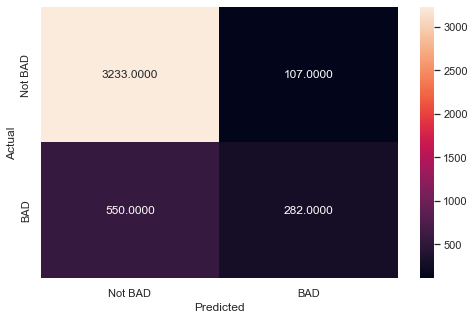

Matthews correlation coefficient is: 0.4217429594964498


In [136]:
y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1431
           1       0.67      0.31      0.43       357

    accuracy                           0.83      1788
   macro avg       0.76      0.64      0.66      1788
weighted avg       0.81      0.83      0.81      1788



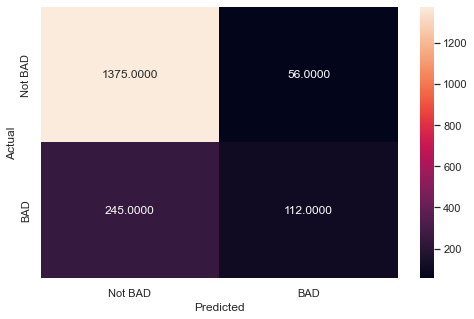

Matthews correlation coefficient is: 0.3762094359240106


In [137]:
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test, y_pred_test)

- Accuracy on train data is 84% & 83% on test data
- Recall is very low 34% for class 1 on train data and 28% on test data. as the Recall is low, model will not help in classifying the BAD customers.


In [94]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.585495
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                          Logit   Df Residuals:                     4156
Method:                           MLE   Df Model:                           15
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                 -0.1719
Time:                        01:30:12   Log-Likelihood:                -2442.7
converged:                       True   LL-Null:                       -2084.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LOAN              -0.1359      0.039     -3.470      0.001      -0.213      -0.059
MORTDUE          

In [88]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

cols = X1.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
DELINQ          0.886286
DEBTINC         0.550287
DEROG           0.509223
NINQ            0.245499
VALUE           0.219762
REASON_HomeImp  0.123897
JOB_Sales       0.104101
JOB_Self        0.091831
JOB_ProfExe    -0.028855
JOB_Other      -0.035330
YOJ            -0.107483
CLNO           -0.141162
JOB_Office     -0.197673
LOAN           -0.221962
MORTDUE        -0.231149
CLAGE          -0.456681

In [89]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

odds
DELINQ          2.426102
DEBTINC         1.733751
DEROG           1.663998
NINQ            1.278258
VALUE           1.245780
REASON_HomeImp  1.131899
JOB_Sales       1.109713
JOB_Self        1.096180
JOB_ProfExe     0.971557
JOB_Other       0.965287
YOJ             0.898092
CLNO            0.868349
JOB_Office      0.820638
LOAN            0.800946
MORTDUE         0.793621
CLAGE           0.633383

# The precision recall curve for logistic

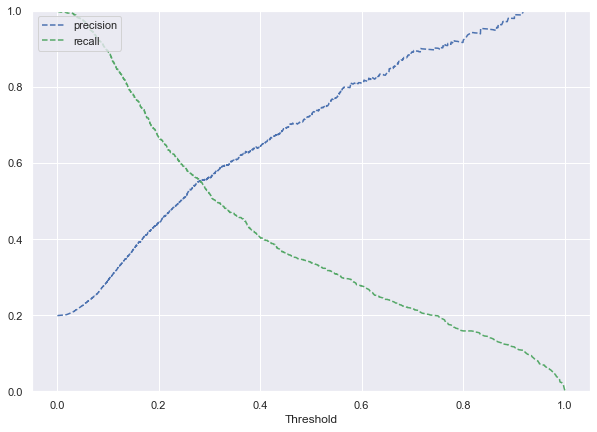

In [90]:
# Metrics to evaluate the model
from sklearn.metrics import precision_recall_curve

y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3340
           1       0.56      0.52      0.54       832

    accuracy                           0.82      4172
   macro avg       0.72      0.71      0.72      4172
weighted avg       0.82      0.82      0.82      4172



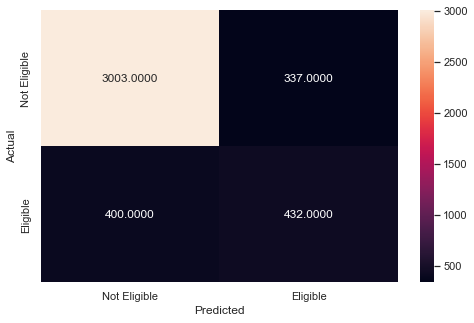

In [138]:
# Perf at optimal Threshold
optimal_threshold1 = .30    #change value here

y_pred_train = lg.predict_proba(x_train)

Opt_Thr_Train = metrics_score1(y_train, y_pred_train[:, 1] > optimal_threshold1)

Opt_Thr_Train


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1431
           1       0.55      0.51      0.53       357

    accuracy                           0.82      1788
   macro avg       0.71      0.70      0.71      1788
weighted avg       0.81      0.82      0.82      1788



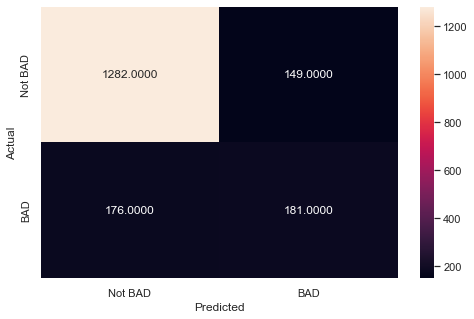

In [92]:
# perf on test data
optimal_threshold1 = .30    #change value here

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

-At the optimal threshold, Accuracy is 82% for train and 89% for test data. It has incrased for test data from the default threshold.
- Recall has increased for class1, 52% and 51% for train and test data respectively
- Prescision has decresed from 70% to 56%, that is expected when we adjust the threshold. 

In [99]:
X1 = x_train.drop(columns = ['JOB_ProfExe','JOB_Other'])
lg1 = LogisticRegression()

lg1.fit(X1,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3340
           1       0.72      0.34      0.46       832

    accuracy                           0.84      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.84      0.82      4172



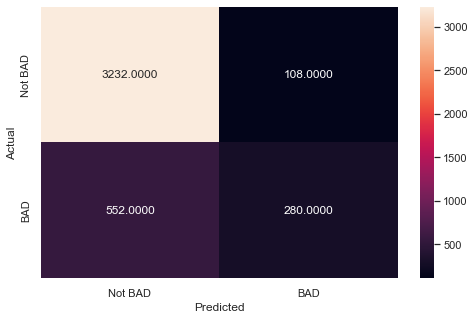

In [100]:
y_pred_train = lg1.predict(X1)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1431
           1       0.67      0.31      0.43       357

    accuracy                           0.83      1788
   macro avg       0.76      0.64      0.66      1788
weighted avg       0.81      0.83      0.81      1788



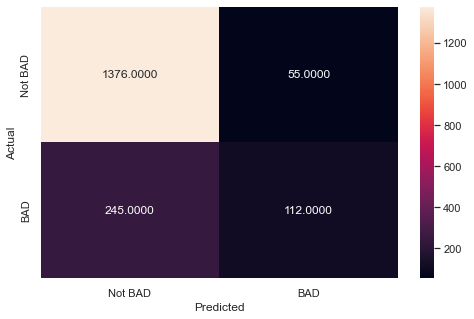

In [101]:
X1_test = x_test.drop(columns = ['JOB_ProfExe','JOB_Other'])
y_pred_test = lg1.predict(X1_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [102]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,StratifiedKFold
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.992064128256...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [103]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.5511081043251532
Best hyperparameters:  {'C': 1, 'class_weight': {0: 0.26585170340681363, 1: 0.7341482965931864}, 'penalty': 'l2'}


In [104]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.24,1:0.75},C=10,penalty="l2")
lr2.fit(x_train,y_train)

LogisticRegression(C=10, class_weight={0: 0.24, 1: 0.75})

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3340
           1       0.51      0.59      0.55       832

    accuracy                           0.80      4172
   macro avg       0.70      0.73      0.71      4172
weighted avg       0.82      0.80      0.81      4172



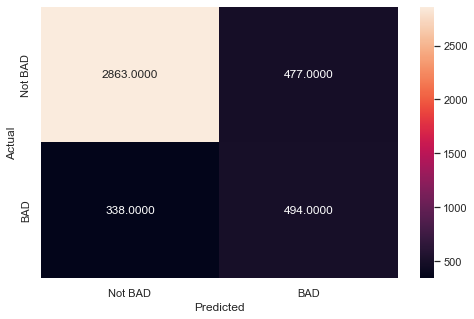

In [130]:
y_pred_train_tuned = lr2.predict(x_train)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train_tuned)


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1431
           1       0.51      0.58      0.54       357

    accuracy                           0.80      1788
   macro avg       0.70      0.72      0.71      1788
weighted avg       0.81      0.80      0.81      1788



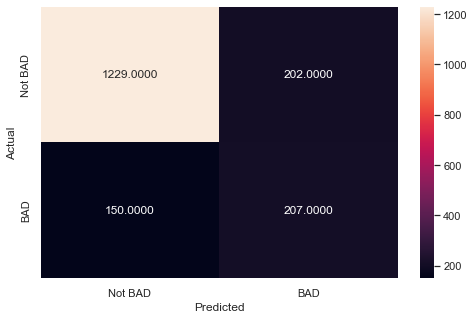

In [131]:
y_pred_test_tuned = lr2.predict(x_test)

#checking the performance on the train dataset

metrics_score(y_test, y_pred_test_tuned)

**Hyperparameter tuning has improved the logistic Regression model. Lets see if we get better perfomance using Decision Tree**

# Decision Tree

In [107]:
# Feture Scaling not required for Deciison Tree
# Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [108]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [109]:
#fitting Decision tree model

dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [110]:
dt

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



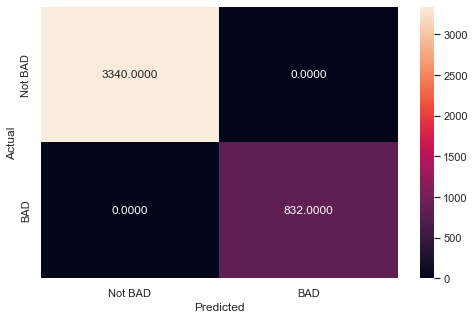

In [111]:
# Checking performance on the training data

Y_train_pred_dt = dt.predict(X_train)

DT_base = metrics_score(Y_train, Y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1431
           1       0.70      0.61      0.65       357

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.87      0.87      0.87      1788



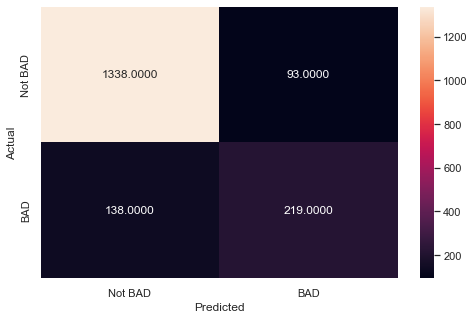

In [112]:
# Checking performance on the testing data

Y_test_pred_dt = dt.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)

- Accuracy is 100% for training and 87% for test data. Model doesnt work well on testing data since Recall is 0.64 in comparison with 1 for training dataset. The Decision Tree is overfitting the training data.


<AxesSubplot:xlabel='Importance'>

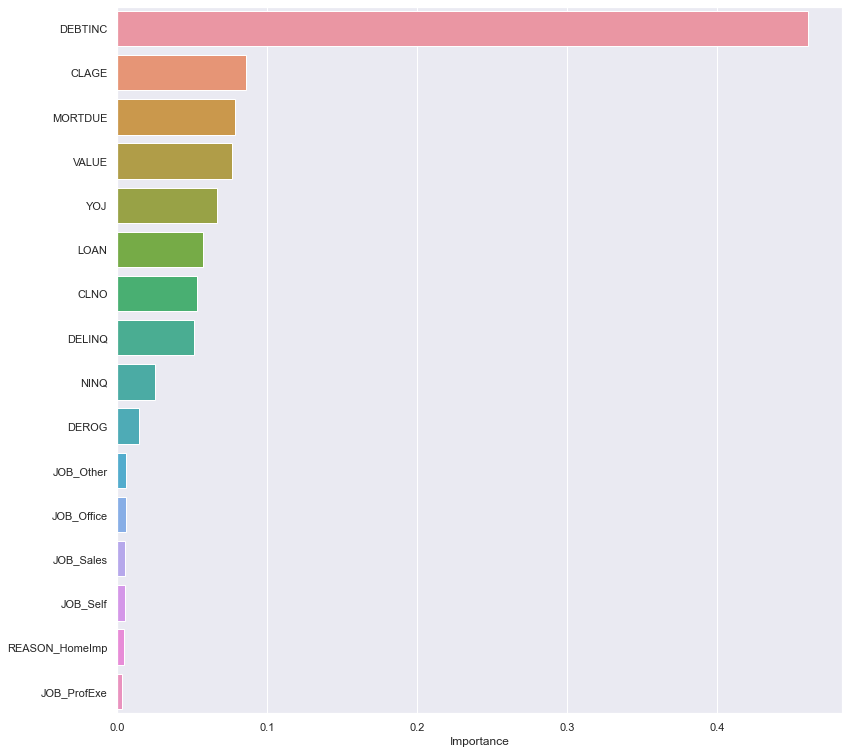

In [277]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

- The most important feature in the model is Debt to Income Ratio, followed by Age of the oldest credit line in months, Amount due on existing mortgage,current value of the property, years at the present job
- The least important features are JOB and REASON

In [ ]:
# Hyperparameter Tuning

In [121]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from

parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fit the GridSearch on train dataset

gridCV = gridCV.fit(X_train, Y_train)


# Set the clf to the best combination of parameters

dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 

dtree_estimator.fit(X_train, Y_train)

 print('Best Criterion:', gridCV.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', gridCV.best_estimator_.get_params()['dec_tree__max_depth'])
    print('min_samples_leaf:', gridCV.best_estimator_.get_params()['min_samples_leaf'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

In [122]:
dtree_estimator

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3340
           1       0.58      0.87      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.86      0.80      4172
weighted avg       0.89      0.85      0.86      4172



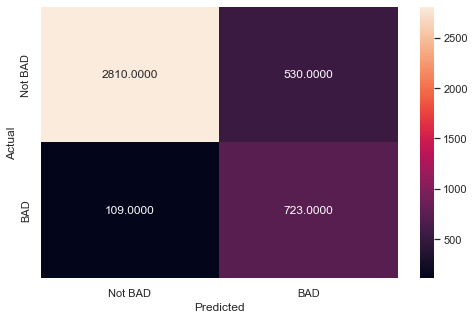

Matthews correlation coefficient is: 0.6191400054670406


In [139]:
Y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(Y_train, Y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.83      0.89      1431
           1       0.55      0.80      0.65       357

    accuracy                           0.83      1788
   macro avg       0.74      0.82      0.77      1788
weighted avg       0.86      0.83      0.84      1788



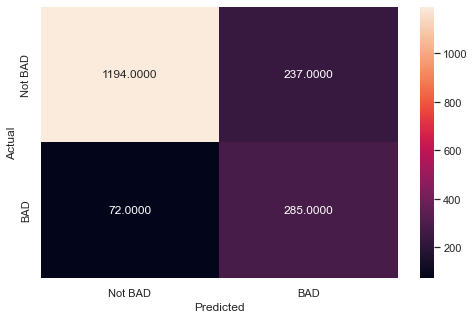

Matthews correlation coefficient is: 0.5562887260703081


In [140]:
Y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)

- Accuracy of the tuned model is 85% and 83% for training and testing dataset respectively.
- Recall is 0.87 for train and 0.80 for test data, a slight decrease in Recall on testing data
- Precision is 0.58 for tain and 0.55 for test data

<AxesSubplot:xlabel='Importance'>

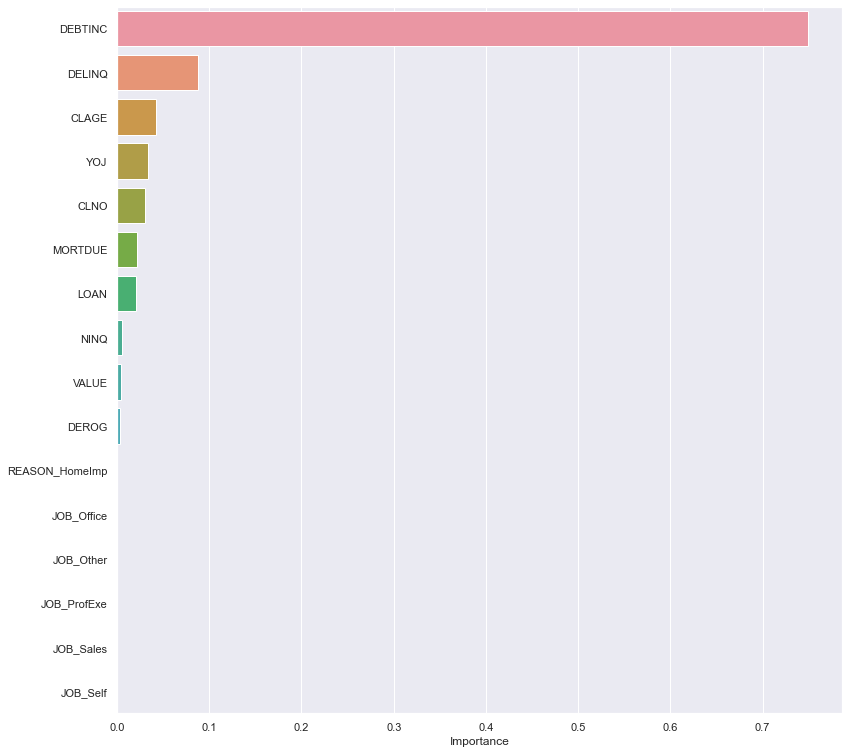

In [281]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

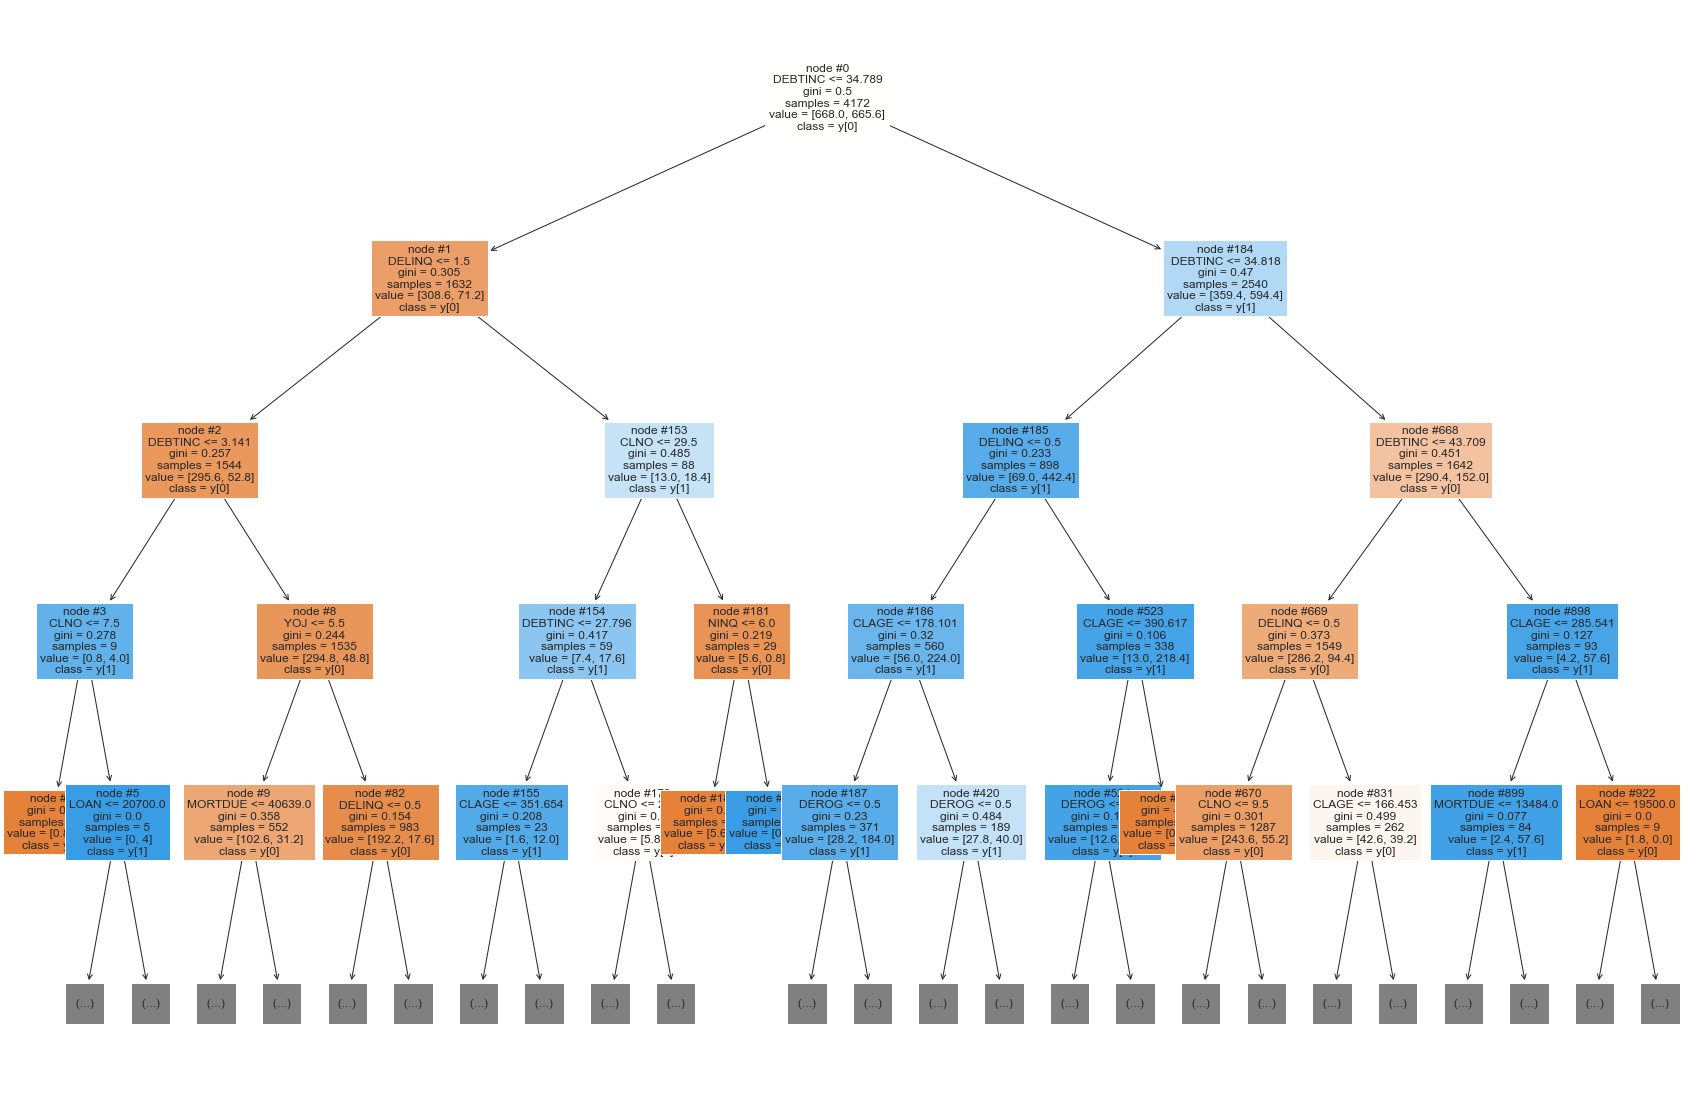

In [282]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

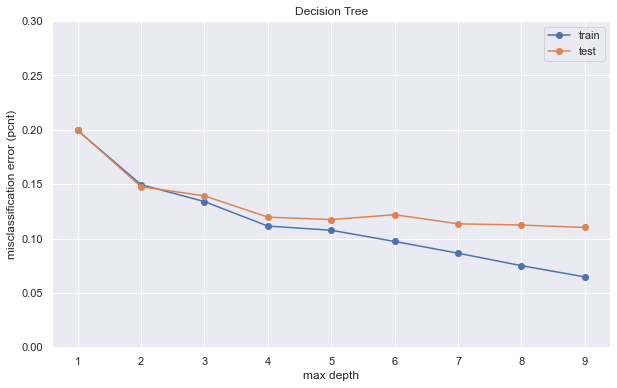

In [301]:
train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    
    clf = clf.fit(X_train, Y_train)
    
    train_scores.append(1 - clf.score(X_train, Y_train))
    
    test_scores.append(1 - clf.score(X_test, Y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')

# Setting the range of the Y-axis
plt.ylim(0, 0.3)

plt.title(f"Decision Tree")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

- Training error keeps on decreasing, but testing error increases after depth 5 and then stabilizes.
- A model with low train error and high test error implies low bias and high variance of the model, i.e., the model has started to overfit the training data, which happens after depth 5.
The train and the test error are close for max_depth = 1 & max_depth =2 but that is again not a good model as the decision tree is making predictions based on 1 and 2 nodes. We can say that the model has a high bias.
The max_depth = 3 , 4 & 5 seems like the "sweet spots" where training and testing errors are balanced.


### **Random Forest Classifier**

In [151]:
# Defining Random forest CLassifier

classifier_rf = RandomForestClassifier(random_state = 1)
classifier_rf.fit(X_train, Y_train)
classifier_rf

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



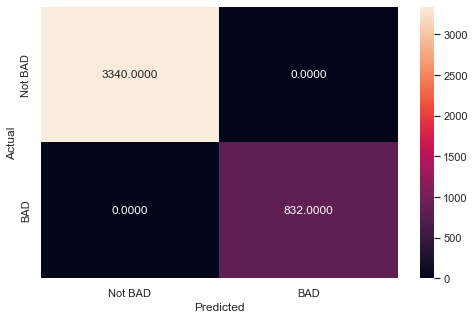

Matthews correlation coefficient is: 1.0


In [152]:
#Checking performance on the training data

Y_pred_train_rf = classifier_rf.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.88      0.66      0.75       357

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



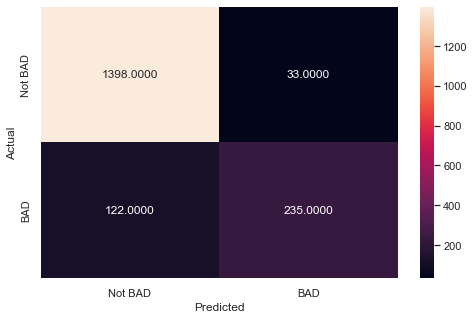

Matthews correlation coefficient is: 0.7113395217124354


In [153]:
# Checking performance on the test data
# Remove _________ and complete the code

Y_pred_test_rf = classifier_rf.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf)

In [154]:
# Buiding RF with class weights
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model

rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



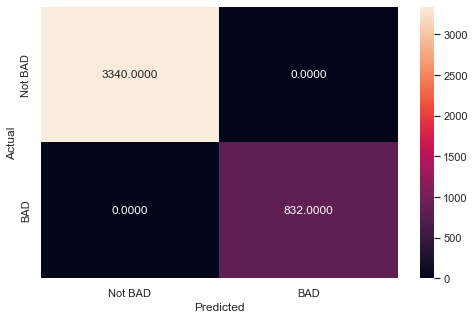

Matthews correlation coefficient is: 1.0


In [155]:
# Checking performance on the train data
Y_pred_train_rf_cw = rf_estimator.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf_cw)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.60      0.70       357

    accuracy                           0.90      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



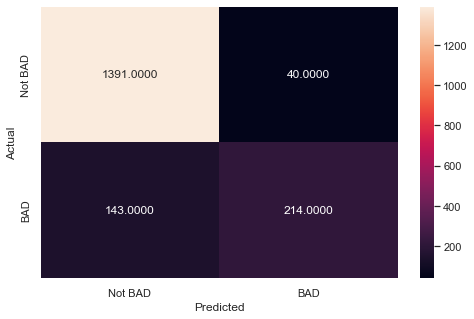

Matthews correlation coefficient is: 0.6543814304506786


In [156]:
# Checking performance on the test data
Y_pred_test_rf_cw = rf_estimator.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf_cw)

In [157]:
# Tuning The RF tree

# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from

params_rf = {  
        "n_estimators": [50, 100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, Y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=3,
                       n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3340
           1       0.92      0.99      0.96       832

    accuracy                           0.98      4172
   macro avg       0.96      0.98      0.97      4172
weighted avg       0.98      0.98      0.98      4172



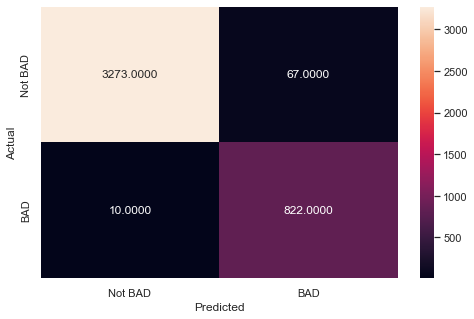

Matthews correlation coefficient is: 0.9444705864940356


In [158]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(Y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1431
           1       0.80      0.71      0.76       357

    accuracy                           0.91      1788
   macro avg       0.87      0.84      0.85      1788
weighted avg       0.90      0.91      0.91      1788



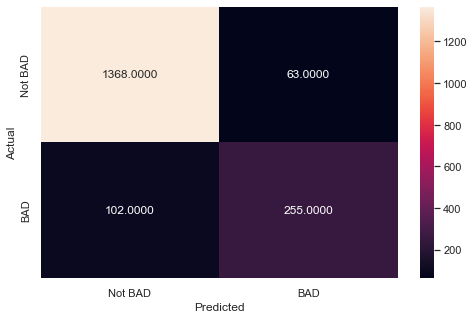

Matthews correlation coefficient is: 0.7006890985419522


In [159]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(Y_test, y_pred_test_rf_tuned)

- Although the accuracy is high, 98% for train data and 91% for test data, the Recall drops significantly in test data to 0.71 in comparison with 0.99 for training data.
- Model is still overfitting the data

<AxesSubplot:xlabel='Importance'>

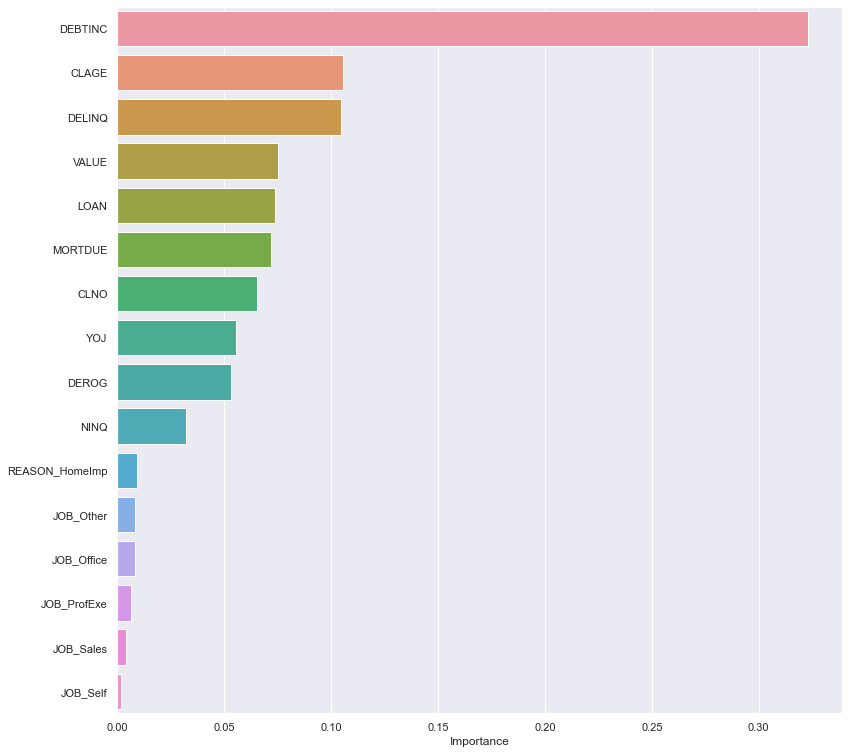

In [160]:
# Checking Feature Importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

- Verifies the results of Decision Tree

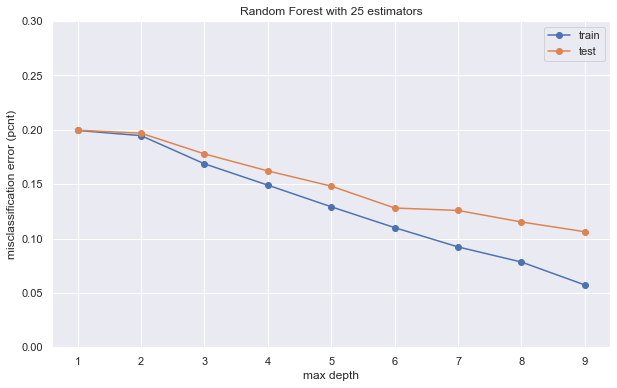

In [161]:
#Finding optimal depth

train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 25)
    
    clf = clf.fit(X_train, Y_train)
    
    train_scores.append(1 - clf.score(X_train, Y_train))
    
    test_scores.append(1 - clf.score(X_test, Y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'upper right')

plt.xlabel('max depth')

plt.ylim(0, 0.3)

plt.ylabel('misclassification error (pcnt)')

plt.title(f"Random Forest with 25 estimators")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

- On averaging 25 decsion trees, We can see that the random forest is giving generalized results at max_depth = 6 which was overfitting for a single decision tree.
- The training error keeps on decreasing, testing error stabilizes afetr max_depth = 6 and steadily decreases later. We can check performance of RF classifier at max_depth = 6 

In [162]:
# checking RF performance at max_depth = 6
rf_estimator6 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1, max_depth = 6, n_estimators=100)



# Fitting Random Forest model

rf_estimator6.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3340
           1       0.68      0.85      0.76       832

    accuracy                           0.89      4172
   macro avg       0.82      0.87      0.84      4172
weighted avg       0.90      0.89      0.90      4172



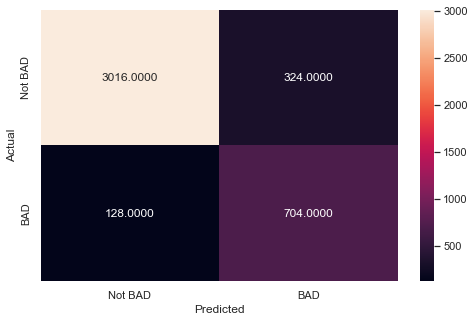

Matthews correlation coefficient is: 0.6946477169927532


In [163]:
Y_pred_train_rf6 = rf_estimator6.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf6)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1431
           1       0.62      0.74      0.68       357

    accuracy                           0.86      1788
   macro avg       0.78      0.82      0.79      1788
weighted avg       0.87      0.86      0.86      1788



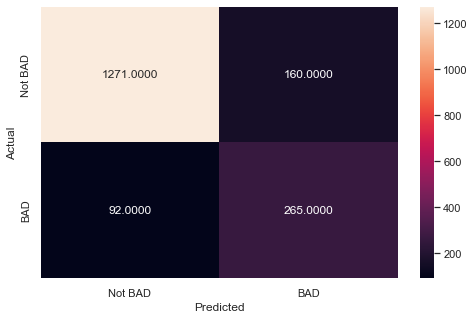

Matthews correlation coefficient is: 0.592089916939764


In [164]:
Y_pred_test_rf6 = rf_estimator6.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf6)

In [167]:
# Tuning again
# Tuning The RF tree

# Choose the type of classifier. 

rf_estimator_tuned2 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from

params_rf = {  
        "n_estimators": [500, 800, 1000],
        "min_samples_leaf": [1,2,4],
        "max_features": ['auto','sqrt'],
        'max_depth': [3,4,5,6,10,15,20]
}


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, Y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned2 = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned2.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=4, n_estimators=800, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3340
           1       0.67      0.84      0.74       832

    accuracy                           0.88      4172
   macro avg       0.81      0.87      0.84      4172
weighted avg       0.90      0.88      0.89      4172



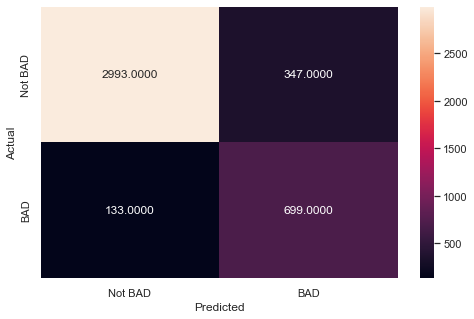

Matthews correlation coefficient is: 0.678736280171911


In [168]:
y_pred_train_rf_tuned2 = rf_estimator_tuned2.predict(X_train)

metrics_score(Y_train, y_pred_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1431
           1       0.62      0.75      0.67       357

    accuracy                           0.86      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.87      0.86      0.86      1788



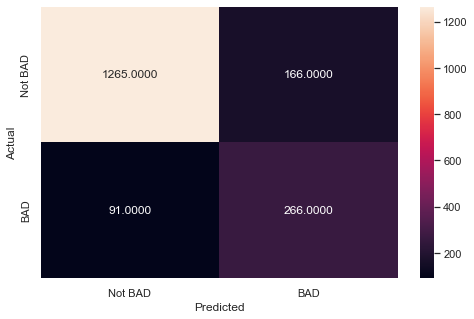

Matthews correlation coefficient is: 0.5874874703842617


In [170]:
y_pred_test_rf_tuned2 = rf_estimator_tuned2.predict(X_test)

metrics_score(Y_test, y_pred_test_rf_tuned2)

<AxesSubplot:xlabel='Importance'>

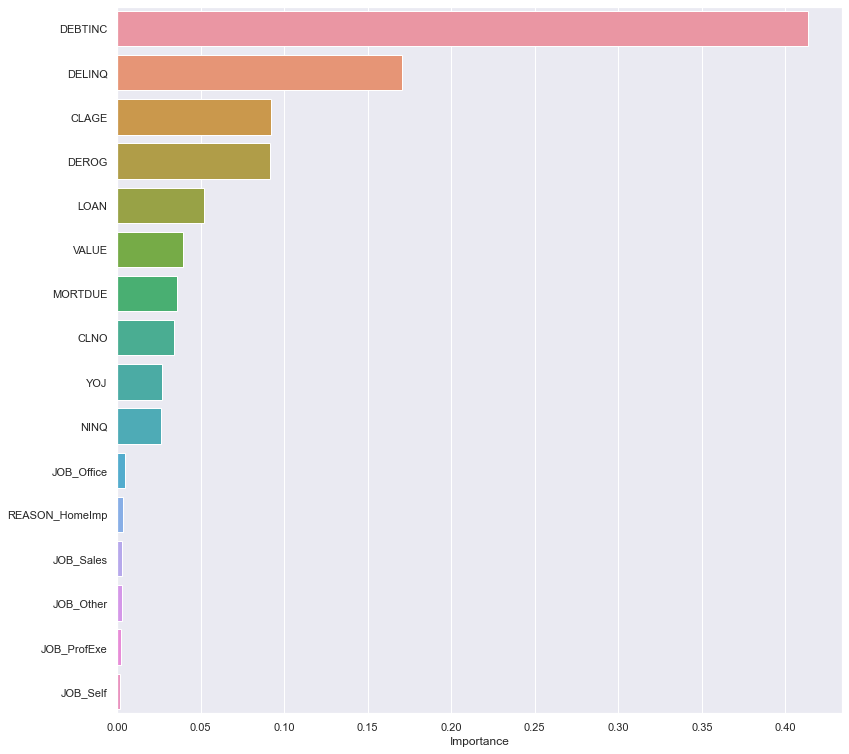

In [171]:
importances = rf_estimator_tuned2.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

# Comparing Model performance

In [176]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
    
    return a # returning the list with train and test scores

In [177]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))

    return b # returning the list with train and test scores

In [178]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
    
    return c # returning the list with train and test scores

In [179]:
# Make the list of all the model names 

models = [dt,dtree_estimator,classifier_rf,rf_estimator,rf_estimator_tuned,rf_estimator6,rf_estimator_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [180]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]


comparison_frame = pd.DataFrame({'Model':['Decision_Tree_Base','Decision_Tree_Tuned',
                                          'RF_Base','RF_with_classWt','RF_tuned','RF_Optdepth','RF_tuned2'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0   Decision_Tree_Base        1.000000       0.870805      1.000000   
1  Decision_Tree_Tuned        0.846836       0.827181      0.868990   
2              RF_Base        1.000000       0.913311      1.000000   
3      RF_with_classWt        1.000000       0.897651      1.000000   
4             RF_tuned        0.981544       0.907718      0.987981   
5          RF_Optdepth        0.891659       0.859060      0.846154   
6            RF_tuned2        0.884947       0.856264      0.840144   

   Test_Recall  Train_Precision  Test_Precision  
0     0.613445         1.000000        0.701923  
1     0.798319         0.577015        0.545977  
2     0.658263         1.000000        0.876866  
3     0.599440         1.000000        0.842520  
4     0.714286         0.924634        0.801887  
5     0.742297         0.684825        0.623529  
6     0.745098         0.668260        0.615741

In [181]:
# For Logistic reg, since x_train & x_test is scaled data, datasets are different than the ones used for Dec Tree & RF (unscaled)

def get_recall_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores


##  Function to calculate precision score
def get_precision_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
    
    return c # returning the list with train and test scores



# Make the list of all the model names 

models = [lg,lr2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]


comparison_frame1 = pd.DataFrame({'Model':['Logistic_Base','Logistic_Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame1

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
0   Logistic_Base        0.842522       0.831655      0.338942     0.313725   
1  Logistic_Tuned        0.804650       0.803132      0.593750     0.579832   

   Train_Precision  Test_Precision  
0         0.724936        0.666667  
1         0.508754        0.506112

In [374]:
comparison_frame3 = comparison_frame2.append(comparison_frame, ignore_index = True)
comparison_frame3

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0           Logistic_Base        0.835570       0.829418      0.301683   
1          Logistic_Tuned        0.811601       0.813199      0.568510   
2  Logistic_Opt_Threshold        0.810000       0.820000      0.560000   
3      Decision_Tree_Base        1.000000       0.870805      1.000000   
4     Decision_Tree_Tuned        0.846836       0.827181      0.868990   
5                 RF_Base        0.925216       0.888702      0.643029   
6         RF_with_classWt        1.000000       0.903803      1.000000   
7                RF_tuned        0.981544       0.907718      0.987981   
8             RF_Optdepth        0.891659       0.859060      0.846154   
9               RF_tuned2        0.884947       0.856264      0.840144   

   Test_Recall  Train_Precision  Test_Precision  
0     0.263305         0.705056        0.691176  
1     0.532213         0.525556        0.532213  
2     0.530000         0.520000        0.540000  
3     0.613445         1.000000        0.701923  
4     0.798319         0.577015        0.545977  
5     0.504202         0.972727        0.891089  
6     0.616246         1.000000        0.862745  
7     0.714286         0.924634        0.801887  
8     0.742297         0.684825        0.623529  
9     0.745098         0.668260        0.615741

Proposed Model: The proposed model is RF_OptDepth with below performance metrics
Train Accuracy: 0.89 Test Accuracy: 0.86 
Train Recall: 0.85 Test Recall: 0.74
74% of the bad loans were correctly identified by the proposed model in the test set.
Train Precision: 0.68    Test Precision:0.62
Of all the test set declines by proposed model, 38% (1 – 0.62) were mislabeled. The creditworthy customers that got declined. This is the opportunity loss for the bank.
